# Initial Model Creation

In [1]:
import pandas as pd
import pylab as pl
import numpy as np
import scipy.optimize as opt
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
%matplotlib inline 
import matplotlib.pyplot as plt

## Creation of Dataset 

In [2]:
def compareIrisLandmarks(irisLandmarks, eyeLandmarks, eyeAnchors):
    deltaVals = []
    for i in range(0, len(irisLandmarks), 3):
        x = irisLandmarks[i]
        y = irisLandmarks[i+1]
        z = irisLandmarks[i+2]
        
        #compare to 
        for j in range(0, len(eyeLandmarks), 3):
            x_c = eyeLandmarks[j]
            y_c = eyeLandmarks[j+1]
            z_c = eyeLandmarks[j+2]
            
            deltaVals.append(x - x_c)
            deltaVals.append(y - y_c)
            deltaVals.append(z - z_c)
        
        for j in range(0, len(eyeAnchors), 3):
            x_c = eyeLandmarks[j]
            y_c = eyeLandmarks[j+1]
            z_c = eyeLandmarks[j+2]
            
            deltaVals.append(x - x_c)
            deltaVals.append(y - y_c)
            deltaVals.append(z - z_c)
    return deltaVals

In [3]:
def create_df(state, filename):
    df = pd.read_csv(filename)
    asNumpyArray = df.to_numpy()
    changedRows = []
    headers = []
    for res in asNumpyArray:
        newRow = compareIrisLandmarks(res[15:30], res[81:108], res[132:138]) + compareIrisLandmarks(res[0:15], res[30:57], res[138:])
        changedRows.append(newRow)
    
    for i in range(len(changedRows[0])):
        headers.append(i)
    
    df = pd.DataFrame(changedRows, columns = headers)
    df['state'] = state
    return df

In [2]:
def create_df(state, filename):
    df = pd.read_csv(filename)
    df['state'] = state
    return df

In [4]:
eyes_up = ['data_0/up.csv', 'data_5/up.csv']
eyes_down = ['data_0/down.csv','data_1/down.csv', 'data_2/down.csv', 'data_3/down.csv', 'data_4/down.csv', 'data_5/down.csv']
eyes_centre = ['data_0/centre.csv', 'data_1/centre.csv', 'data_2/centre.csv', 'data_3/centre.csv', 'data_4/centre.csv', 'data_5/centre.csv']
eyes_right = ['data_0/right.csv', 'data_1/right.csv', 'data_2/right.csv', 'data_3/right.csv', 'data_4/right.csv', 'data_5/right.csv']
eyes_left = ['data_0/left.csv', 'data_1/left.csv', 'data_2/left.csv', 'data_3/left.csv', 'data_4/left.csv', 'data_5/left.csv']

In [5]:
stated_dfs = []
for csv in eyes_up:
    stated_dfs.append(create_df(0, "iris_state_training_data/{}".format(csv)))
    
for csv in eyes_down:
    stated_dfs.append(create_df(1, "iris_state_training_data/{}".format(csv)))
    
for csv in eyes_centre:
    stated_dfs.append(create_df(2, "iris_state_training_data/{}".format(csv)))
    
for csv in eyes_right:
    stated_dfs.append(create_df(3, "iris_state_training_data/{}".format(csv)))
    
for csv in eyes_left:
    stated_dfs.append(create_df(4, "iris_state_training_data/{}".format(csv)))


## Put it all together

In [6]:
all_data = pd.concat(stated_dfs)

In [7]:
all_data['state'] = all_data['state'].astype('int')
y = np.asarray(all_data['state'])
y [0:5]

array([0, 0, 0, 0, 0])

In [8]:
just_x_df = all_data.drop('state', axis = 1)

In [9]:
just_x_df.head()

0         1         2         3         4         5         6    \
0  0.019990 -0.006422  0.003846  0.015282 -0.013095  0.024077  0.010553   
1  0.020521 -0.006213 -0.022628  0.015843 -0.012833 -0.000269  0.011159   
2  0.020297 -0.005311 -0.034801  0.015915 -0.011708 -0.011217  0.011492   
3  0.020333 -0.004541 -0.037219  0.015931 -0.011002 -0.013677  0.011487   
4  0.020920 -0.004685 -0.045908  0.016546 -0.011071 -0.021127  0.012086   

        7         8         9    ...       320       321       322       323  \
0 -0.017047  0.040811  0.004433  ... -0.003404  0.019587  0.007638 -0.001226   
1 -0.016744  0.018966  0.004982  ...  0.025933  0.020869  0.007597  0.027810   
2 -0.015541  0.008874  0.005553  ...  0.016172  0.020469  0.008198  0.018565   
3 -0.014989  0.006407  0.005474  ...  0.014425  0.020603  0.008148  0.016904   
4 -0.014967  0.000208  0.006060  ...  0.018820  0.020602  0.007859  0.020886   

        324       325       326       327       328       329  
0 -0.023679  0.014183 -0.101220 -0.019934  0.007693 -0.073385  
1 -0.022440  0.013820 -0.070511 -0.018664  0.007294 -0.041974  
2 -0.022964  0.014134 -0.085745 -0.019187  0.007475 -0.057036  
3 -0.022740  0.014264 -0.087452 -0.018928  0.007489 -0.058691  
4 -0.023074  0.014607 -0.084364 -0.019317  0.008073 -0.054836  

[5 rows x 330 columns]

In [10]:
X = np.asarray(just_x_df)
X[0:5]

array([[ 0.01999006, -0.0064215 ,  0.0038465 , ..., -0.0199342 ,
         0.00769323, -0.07338545],
       [ 0.02052056, -0.00621259, -0.02262814, ..., -0.01866421,
         0.00729426, -0.04197386],
       [ 0.02029737, -0.00531104, -0.03480096, ..., -0.01918738,
         0.00747539, -0.0570357 ],
       [ 0.02033339, -0.00454124, -0.03721944, ..., -0.01892849,
         0.00748872, -0.05869146],
       [ 0.02092042, -0.00468509, -0.04590757, ..., -0.01931739,
         0.00807302, -0.05483561]])

In [11]:
from sklearn.pipeline import make_pipeline 
from sklearn.preprocessing import StandardScaler 

from sklearn.linear_model import LogisticRegression, RidgeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.metrics import accuracy_score # Accuracy metrics 
from sklearn.metrics import classification_report, confusion_matrix
import itertools


In [12]:
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

In [13]:
from sklearn.model_selection import RepeatedKFold 
kf = RepeatedKFold(n_splits=5, n_repeats=10, random_state=None) 
pipelines = {
    'lr':make_pipeline(StandardScaler(), LogisticRegression()),
    'rc':make_pipeline(StandardScaler(), RidgeClassifier()),
    'rf':make_pipeline(StandardScaler(), RandomForestClassifier()),
    'gb':make_pipeline(StandardScaler(), GradientBoostingClassifier()),
}
fit_models = {}

In [14]:
for train_index, test_index in kf.split(X):
    print("Train:", train_index, "Validation:",test_index)
    X_train, X_test = X[train_index], X[test_index] 
    y_train, y_test = y[train_index], y[test_index]
    for algo, pipeline in pipelines.items():
        model = pipeline.fit(X_train, y_train)
        fit_models[algo] = model

Train: [   1    2    4 ... 3426 3427 3429] Validation: [   0    3    6    9   15   24   25   26   43   45   54   55   57   60
   63   74   75   79   89   93  102  104  106  111  120  127  131  137
  140  142  143  148  149  154  164  170  171  173  177  183  187  192
  200  201  204  205  211  213  217  223  224  229  232  234  245  248
  251  253  260  264  265  266  292  299  301  307  324  326  350  358
  366  370  378  384  388  401  411  423  425  434  436  442  450  452
  462  464  466  469  474  481  484  495  496  498  500  501  512  514
  516  518  521  534  536  539  540  544  549  554  564  570  572  581
  587  593  595  600  603  612  616  629  636  637  641  644  652  658
  659  662  667  669  671  672  677  679  680  682  687  703  704  706
  713  714  716  718  719  721  726  729  743  751  754  758  760  763
  769  770  779  784  785  788  799  802  809  814  820  821  831  834
  838  858  861  870  875  892  893  899  906  909  922  932  938  939
  942  945  951  957  

c:\users\roxan\appdata\local\programs\python\python37\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
c:\users\roxan\appdata\local\programs\python\python37\lib\site-packages\sklearn\linear_model\logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
c:\users\roxan\appdata\local\programs\python\python37\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


Train: [   0    1    3 ... 3426 3428 3429] Validation: [   2    4   12   20   21   30   38   39   40   50   53   56   61   64
   70   82   85   97  101  115  118  130  132  134  144  153  155  167
  168  179  184  188  190  191  193  203  207  209  214  215  222  228
  236  239  242  243  244  246  255  259  270  271  273  275  276  277
  279  283  295  312  315  327  328  335  336  344  345  349  353  363
  367  369  375  376  379  385  387  389  391  398  399  405  406  413
  416  433  443  444  446  448  449  455  467  475  477  478  510  519
  523  527  533  541  547  548  559  560  562  567  569  574  577  580
  608  615  617  623  630  631  638  661  663  664  668  670  675  676
  678  693  697  701  712  717  733  737  742  745  753  756  757  762
  773  775  780  781  782  786  787  789  790  796  797  804  806  826
  827  836  842  852  853  859  864  867  868  869  872  876  881  882
  884  885  889  890  891  895  907  917  918  919  921  927  928  934
  950  955  959  960  

c:\users\roxan\appdata\local\programs\python\python37\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
c:\users\roxan\appdata\local\programs\python\python37\lib\site-packages\sklearn\linear_model\logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


Train: [   0    2    3 ... 3426 3427 3428] Validation: [   1    5   10   11   18   23   29   37   41   44   48   49   51   59
   67   78   83   86   87   90   91   96   98  100  103  105  109  113
  114  122  125  128  135  138  146  147  156  161  169  178  194  216
  221  230  237  247  252  256  258  262  263  268  269  280  281  285
  293  306  310  311  316  318  322  323  330  337  341  348  354  356
  360  365  368  371  377  380  382  383  392  396  404  419  421  426
  429  430  432  440  441  451  459  463  465  479  480  485  486  490
  499  503  524  526  529  530  531  532  543  555  563  565  579  586
  588  592  594  597  598  601  602  606  607  613  614  619  622  624
  628  632  643  646  653  654  665  666  681  684  688  689  692  700
  708  710  715  720  723  725  749  750  759  761  765  774  778  791
  792  793  798  801  805  819  824  829  832  837  841  843  845  848
  854  856  860  866  873  878  886  897  900  902  908  910  914  915
  920  929  952  953  

c:\users\roxan\appdata\local\programs\python\python37\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
c:\users\roxan\appdata\local\programs\python\python37\lib\site-packages\sklearn\linear_model\logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


Train: [   0    1    2 ... 3427 3428 3429] Validation: [   8   17   19   22   27   28   32   33   35   42   46   47   52   58
   68   69   76   77   80   81   94  107  112  119  123  129  133  136
  141  150  151  159  160  163  172  174  175  176  180  182  196  198
  210  218  219  225  226  227  233  238  241  254  261  274  286  289
  291  296  303  304  305  313  314  319  331  332  333  338  339  340
  342  346  347  355  359  361  374  381  390  394  395  400  402  403
  409  410  415  418  424  431  438  439  447  454  456  457  460  461
  468  472  476  483  489  494  504  505  507  509  513  515  517  520
  528  537  542  545  546  550  551  552  556  557  568  575  576  578
  582  584  585  589  596  611  621  633  642  648  649  650  651  656
  673  683  685  686  691  694  695  696  702  705  709  727  728  731
  732  735  736  739  741  746  748  752  755  764  766  767  768  777
  783  795  800  808  822  823  828  830  835  846  849  851  855  863
  865  871  880  883  

c:\users\roxan\appdata\local\programs\python\python37\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
c:\users\roxan\appdata\local\programs\python\python37\lib\site-packages\sklearn\linear_model\logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


Train: [   0    1    2 ... 3427 3428 3429] Validation: [   7   13   14   16   31   34   36   62   65   66   71   72   73   84
   88   92   95   99  108  110  116  117  121  124  126  139  145  152
  157  158  162  165  166  181  185  186  189  195  197  199  202  206
  208  212  220  231  235  240  249  250  257  267  272  278  282  284
  287  288  290  294  297  298  300  302  308  309  317  320  321  325
  329  334  343  351  352  357  362  364  372  373  386  393  397  407
  408  412  414  417  420  422  427  428  435  437  445  453  458  470
  471  473  482  487  488  491  492  493  497  502  506  508  511  522
  525  535  538  553  558  561  566  571  573  583  590  591  599  604
  605  609  610  618  620  625  626  627  634  635  639  640  645  647
  655  657  660  674  690  698  699  707  711  722  724  730  734  738
  740  744  747  771  772  776  794  803  807  810  811  812  813  815
  816  817  818  825  833  839  840  844  847  850  857  862  874  877
  879  894  898  905  

c:\users\roxan\appdata\local\programs\python\python37\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
c:\users\roxan\appdata\local\programs\python\python37\lib\site-packages\sklearn\linear_model\logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


Train: [   1    2    3 ... 3425 3427 3428] Validation: [   0   15   27   28   33   42   44   53   56   60   86   87   96  105
  110  117  122  127  129  131  133  140  142  149  158  160  164  167
  170  171  174  175  177  194  200  212  215  219  220  224  226  243
  253  262  263  266  267  272  274  276  280  283  287  293  298  300
  304  308  314  319  334  335  336  337  345  348  351  357  373  375
  386  388  390  391  392  393  398  401  411  413  418  421  433  437
  441  452  455  464  466  472  474  479  482  485  487  488  493  496
  499  503  505  510  512  513  515  522  525  536  537  539  541  557
  563  564  565  569  581  584  587  589  590  591  592  613  624  631
  639  641  647  648  649  650  654  655  656  672  673  675  683  685
  693  699  703  707  712  721  725  731  736  741  760  769  776  780
  785  788  791  795  796  810  815  821  825  827  840  846  850  854
  856  857  859  863  872  874  880  881  883  887  899  900  901  902
  908  918  921  923  

c:\users\roxan\appdata\local\programs\python\python37\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
c:\users\roxan\appdata\local\programs\python\python37\lib\site-packages\sklearn\linear_model\logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


Train: [   0    2    3 ... 3426 3427 3429] Validation: [   1    5    7    9   12   14   18   23   26   39   46   51   54   58
   69   80   94   99  101  104  113  125  134  155  178  184  185  186
  195  196  197  198  202  203  216  235  237  238  239  247  255  257
  259  261  273  282  290  294  296  299  302  303  311  312  318  322
  323  328  329  330  338  346  349  366  367  370  372  377  385  396
  404  405  408  409  416  417  422  427  430  432  436  439  440  449
  450  451  465  467  475  484  486  489  494  497  507  511  518  527
  531  534  542  547  554  556  562  566  575  576  577  586  588  604
  605  611  617  618  621  623  627  629  636  637  652  663  664  676
  680  681  692  697  698  706  711  713  714  719  729  730  732  734
  737  743  747  753  755  756  757  759  768  770  773  781  782  783
  784  789  794  799  808  809  811  819  823  824  831  832  834  838
  841  849  853  860  861  866  868  873  892  896  898  912  914  917
  922  928  934  939  

c:\users\roxan\appdata\local\programs\python\python37\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
c:\users\roxan\appdata\local\programs\python\python37\lib\site-packages\sklearn\linear_model\logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


Train: [   0    1    5 ... 3427 3428 3429] Validation: [   2    3    4   17   19   21   29   34   40   43   47   52   59   61
   65   71   81   84   88   92   98  102  107  112  119  120  135  138
  145  168  179  181  183  187  188  191  193  204  209  211  217  218
  223  228  248  252  268  270  271  275  291  297  309  310  321  324
  340  350  352  356  361  363  371  374  378  380  387  389  397  406
  415  424  434  435  438  443  446  448  457  461  462  463  469  471
  473  477  478  481  492  501  502  504  506  508  509  516  521  524
  526  529  530  540  543  544  545  549  550  568  578  583  585  595
  596  600  601  622  625  626  628  643  646  657  658  659  661  665
  667  668  669  671  678  686  688  689  700  701  709  715  723  733
  735  742  746  750  751  786  797  800  802  805  806  818  845  847
  851  855  862  864  865  869  871  876  877  884  885  889  890  891
  893  904  905  907  909  910  911  915  919  925  927  930  931  948
  950  958  965  970  

c:\users\roxan\appdata\local\programs\python\python37\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
c:\users\roxan\appdata\local\programs\python\python37\lib\site-packages\sklearn\linear_model\logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


Train: [   0    1    2 ... 3427 3428 3429] Validation: [   6    8   10   20   24   30   37   41   45   64   67   68   73   76
   78   79   83   85   90   91   93   95   97  100  108  111  114  115
  116  121  124  128  130  132  137  141  143  144  148  153  156  157
  161  162  163  165  169  173  180  190  192  205  206  207  210  213
  214  221  230  236  240  241  242  244  245  246  250  258  260  264
  277  279  285  286  288  295  301  315  317  320  325  339  342  343
  344  347  353  354  359  360  362  364  365  369  376  379  383  384
  403  410  412  414  425  428  429  445  454  456  476  480  483  495
  500  514  523  528  532  535  538  546  548  553  555  558  559  561
  571  572  573  574  579  582  593  597  599  606  610  615  635  638
  642  645  651  653  662  666  670  674  677  684  690  691  696  702
  705  717  718  720  724  726  727  728  744  749  761  763  764  765
  766  771  772  778  779  787  790  798  812  816  828  829  833  835
  837  842  843  848  

c:\users\roxan\appdata\local\programs\python\python37\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
c:\users\roxan\appdata\local\programs\python\python37\lib\site-packages\sklearn\linear_model\logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


Train: [   0    1    2 ... 3426 3428 3429] Validation: [  11   13   16   22   25   31   32   35   36   38   48   49   50   55
   57   62   63   66   70   72   74   75   77   82   89  103  106  109
  118  123  126  136  139  146  147  150  151  152  154  159  166  172
  176  182  189  199  201  208  222  225  227  229  231  232  233  234
  249  251  254  256  265  269  278  281  284  289  292  305  306  307
  313  316  326  327  331  332  333  341  355  358  368  381  382  394
  395  399  400  402  407  419  420  423  426  431  442  444  447  453
  458  459  460  468  470  490  491  498  517  519  520  533  551  552
  560  567  570  580  594  598  602  603  607  608  609  612  614  616
  619  620  630  632  633  634  640  644  660  679  682  687  694  695
  704  708  710  716  722  738  739  740  745  748  752  754  758  762
  767  774  775  777  792  793  801  803  804  807  813  814  817  820
  822  826  830  836  839  844  852  858  870  875  879  886  888  894
  903  913  920  924  

c:\users\roxan\appdata\local\programs\python\python37\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
c:\users\roxan\appdata\local\programs\python\python37\lib\site-packages\sklearn\linear_model\logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


Train: [   0    1    2 ... 3426 3428 3429] Validation: [   6   28   35   43   47   49   54   62   63   70   74   80   84   85
   98   99  102  104  108  120  122  124  131  134  139  141  143  144
  147  149  151  153  156  157  165  167  172  174  178  185  192  193
  198  202  203  208  211  221  224  226  228  229  234  235  238  241
  242  245  248  256  258  259  286  287  293  311  312  314  316  327
  330  332  335  336  343  345  346  352  360  362  366  368  369  375
  402  403  420  426  427  428  430  434  436  449  452  453  464  466
  471  475  479  487  488  489  491  492  493  494  500  503  509  511
  514  517  518  522  523  524  530  532  537  539  540  541  546  561
  563  572  573  575  576  585  594  595  597  599  607  612  613  616
  617  620  630  632  640  645  647  651  654  656  657  660  663  674
  675  681  684  695  699  700  703  711  719  721  734  740  745  755
  769  775  781  782  790  795  797  801  803  804  805  806  807  808
  814  815  816  829  

c:\users\roxan\appdata\local\programs\python\python37\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
c:\users\roxan\appdata\local\programs\python\python37\lib\site-packages\sklearn\linear_model\logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


Train: [   0    1    3 ... 3425 3427 3428] Validation: [   2    9   12   20   22   24   27   29   30   38   39   42   50   58
   64   67   68   75   79   83   86   93  103  107  115  116  128  159
  161  166  168  170  179  191  195  197  209  217  219  220  230  237
  239  240  246  250  252  253  255  263  272  273  279  285  290  291
  294  296  299  300  303  309  310  317  326  350  356  361  363  371
  372  374  381  388  392  393  395  398  406  410  412  416  422  424
  429  433  435  455  458  460  467  476  480  482  485  490  495  497
  504  510  519  520  526  533  542  549  554  556  567  568  569  571
  586  593  608  610  611  615  618  623  627  633  637  649  652  667
  671  673  685  687  712  713  720  724  725  733  743  751  753  754
  757  759  761  762  764  774  776  779  784  786  788  793  819  820
  823  825  842  844  848  853  856  858  873  875  881  886  887  890
  891  893  894  908  927  937  952  958  960  967  972  982  988  991
  992  994  997  999 1

c:\users\roxan\appdata\local\programs\python\python37\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
c:\users\roxan\appdata\local\programs\python\python37\lib\site-packages\sklearn\linear_model\logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


Train: [   0    2    3 ... 3426 3427 3429] Validation: [   1    5    8   10   14   17   21   25   26   33   36   37   40   44
   66   73   76   89   90   92   94   95   97  100  109  117  119  123
  125  133  135  137  138  142  146  150  152  163  164  171  177  181
  182  183  187  196  200  204  207  210  213  227  231  236  243  260
  262  264  265  266  267  268  269  274  283  289  297  302  307  322
  323  325  329  331  333  339  344  347  354  355  364  365  377  378
  384  394  400  404  405  413  414  437  440  441  445  447  450  456
  477  478  496  505  513  516  528  531  547  550  552  553  555  559
  560  578  580  581  588  590  591  602  606  609  625  628  631  635
  641  643  644  646  648  662  664  665  672  677  678  689  690  694
  697  701  702  704  714  716  722  723  728  731  737  741  744  746
  750  752  756  758  767  768  772  773  777  783  785  789  791  799
  802  809  811  821  824  827  828  833  838  839  841  855  857  862
  865  874  913  916  

c:\users\roxan\appdata\local\programs\python\python37\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
c:\users\roxan\appdata\local\programs\python\python37\lib\site-packages\sklearn\linear_model\logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


Train: [   1    2    5 ... 3427 3428 3429] Validation: [   0    3    4   13   16   18   19   23   34   48   51   52   53   55
   57   59   60   65   71   77   78   96  101  111  112  114  118  121
  129  130  140  145  162  175  176  186  188  190  194  212  216  225
  244  247  249  251  270  275  276  277  282  284  288  292  295  298
  301  304  305  306  308  313  320  321  328  334  337  342  348  351
  353  357  358  359  367  370  373  376  382  385  387  390  396  397
  401  408  409  418  438  439  443  444  448  451  454  459  461  463
  468  474  481  483  486  498  499  501  508  521  529  534  535  544
  548  551  557  558  565  574  577  579  582  587  589  592  598  600
  601  603  621  629  636  638  642  650  653  655  661  666  668  670
  680  682  683  686  688  693  698  707  715  717  718  726  730  735
  738  739  742  748  760  787  796  800  810  812  817  818  822  834
  846  860  866  871  877  878  880  884  885  888  889  892  896  911
  912  915  919  920  

c:\users\roxan\appdata\local\programs\python\python37\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
c:\users\roxan\appdata\local\programs\python\python37\lib\site-packages\sklearn\linear_model\logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


Train: [   0    1    2 ... 3427 3428 3429] Validation: [   7   11   15   31   32   41   45   46   56   61   69   72   81   82
   87   88   91  105  106  110  113  126  127  132  136  148  154  155
  158  160  169  173  180  184  189  199  201  205  206  214  215  218
  222  223  232  233  254  257  261  271  278  280  281  315  318  319
  324  338  340  341  349  379  380  383  386  389  391  399  407  411
  415  417  419  421  423  425  431  432  442  446  457  462  465  469
  470  472  473  484  502  506  507  512  515  525  527  536  538  543
  545  562  564  566  570  583  584  596  604  605  614  619  622  624
  626  634  639  658  659  669  676  679  691  692  696  705  706  708
  709  710  727  729  732  736  747  749  763  765  766  770  771  778
  780  792  794  798  813  826  832  835  840  843  850  851  854  859
  861  879  882  883  895  898  900  901  903  904  906  907  909  914
  922  934  936  947  951  953  959  962  963  964  974  975  980  984
  985 1000 1001 1002 1

c:\users\roxan\appdata\local\programs\python\python37\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
c:\users\roxan\appdata\local\programs\python\python37\lib\site-packages\sklearn\linear_model\logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


Train: [   2    3    4 ... 3426 3427 3428] Validation: [   0    1    7   19   47   52   53   69   71   74   75   77   83   84
   91  109  112  120  122  124  129  144  150  152  155  156  161  167
  171  173  178  186  188  189  195  199  207  211  214  216  219  220
  224  230  232  244  246  247  251  260  288  292  294  295  297  298
  309  314  315  318  327  329  332  344  348  349  354  355  357  359
  363  366  367  369  371  377  380  390  413  423  424  428  430  435
  445  451  452  454  465  480  484  487  497  503  508  520  524  526
  534  537  539  544  548  556  571  574  601  604  605  607  609  620
  624  627  633  636  639  644  653  655  656  663  666  668  673  678
  683  689  697  698  699  702  703  705  720  726  728  736  744  745
  747  751  753  754  755  756  766  780  786  787  807  810  826  832
  833  834  838  846  852  853  856  858  861  868  872  879  884  887
  888  890  898  901  908  909  911  912  921  922  934  935  949  954
  957  958  968  972  

c:\users\roxan\appdata\local\programs\python\python37\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
c:\users\roxan\appdata\local\programs\python\python37\lib\site-packages\sklearn\linear_model\logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


Train: [   0    1    2 ... 3427 3428 3429] Validation: [   5    6   13   22   28   30   33   37   41   48   50   60   64   73
   78   81   93   94   96   98  102  103  105  111  113  115  117  125
  133  137  141  142  148  149  159  160  165  168  175  197  200  204
  217  218  222  223  234  235  236  249  252  253  254  259  265  279
  280  282  293  310  317  322  326  333  350  358  364  388  389  395
  400  405  406  415  418  420  422  434  437  440  444  448  456  458
  460  466  467  468  471  472  478  490  502  505  507  511  512  516
  527  542  543  546  554  557  562  564  566  576  579  580  586  589
  591  597  599  618  619  625  626  628  635  637  645  646  648  654
  664  677  684  685  691  693  704  707  711  712  721  729  737  738
  740  743  750  758  759  760  761  767  768  772  774  776  782  793
  798  802  811  813  814  816  823  830  831  835  837  840  849  850
  854  873  875  881  891  902  904  923  940  941  944  945  950  956
  974  977  982  983  

c:\users\roxan\appdata\local\programs\python\python37\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
c:\users\roxan\appdata\local\programs\python\python37\lib\site-packages\sklearn\linear_model\logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


Train: [   0    1    2 ... 3424 3425 3429] Validation: [   3    8   12   32   34   36   39   40   43   55   57   67   76   79
   90  101  104  107  118  121  126  130  131  135  136  143  153  158
  164  166  174  177  179  184  187  190  198  208  209  210  212  213
  221  226  228  238  241  242  245  248  256  261  262  271  275  291
  299  302  304  306  323  330  331  336  339  351  352  353  368  370
  379  381  382  384  385  394  398  402  403  404  409  412  414  417
  427  436  438  439  441  443  447  449  450  453  459  463  469  474
  475  479  482  486  489  493  495  498  500  515  519  521  529  535
  538  545  549  553  558  560  565  569  570  577  584  587  590  595
  598  600  603  611  612  615  616  617  621  623  631  634  638  649
  652  659  665  669  670  672  682  695  696  701  708  715  716  719
  723  724  727  730  731  732  734  748  752  763  770  791  799  812
  819  821  822  836  842  843  857  860  862  869  874  885  886  897
  900  910  913  914  

c:\users\roxan\appdata\local\programs\python\python37\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
c:\users\roxan\appdata\local\programs\python\python37\lib\site-packages\sklearn\linear_model\logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


Train: [   0    1    2 ... 3427 3428 3429] Validation: [   4    9   10   11   17   18   20   26   29   38   42   45   49   51
   54   56   63   66   68   70   80   82   87   88   89   92  100  116
  132  138  139  146  151  157  162  170  180  182  185  191  192  193
  196  201  202  203  206  237  240  243  250  258  266  267  268  269
  276  277  281  283  284  285  301  307  308  312  313  320  321  324
  325  328  335  337  346  361  362  374  375  383  386  387  392  397
  401  410  416  429  433  446  455  470  473  477  488  494  509  510
  517  518  522  523  528  532  536  540  550  551  552  555  561  563
  578  581  583  585  592  594  596  630  640  642  643  647  662  674
  675  676  679  681  688  692  694  710  717  718  722  725  735  739
  742  746  757  764  765  769  775  777  779  781  783  784  785  788
  789  790  792  794  795  796  797  803  804  806  815  818  827  839
  841  844  845  848  863  864  865  870  871  876  877  878  883  889
  892  895  899  915  

c:\users\roxan\appdata\local\programs\python\python37\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
c:\users\roxan\appdata\local\programs\python\python37\lib\site-packages\sklearn\linear_model\logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


Train: [   0    1    3 ... 3427 3428 3429] Validation: [   2   14   15   16   21   23   24   25   27   31   35   44   46   58
   59   61   62   65   72   85   86   95   97   99  106  108  110  114
  119  123  127  128  134  140  145  147  154  163  169  172  176  181
  183  194  205  215  225  227  229  231  233  239  255  257  263  264
  270  272  273  274  278  286  287  289  290  296  300  303  305  311
  316  319  334  338  340  341  342  343  345  347  356  360  365  372
  373  376  378  391  393  396  399  407  408  411  419  421  425  426
  431  432  442  457  461  462  464  476  481  483  485  491  492  496
  499  501  504  506  513  514  525  530  531  533  541  547  559  567
  568  572  573  575  582  588  593  602  606  608  610  613  614  622
  629  632  641  650  651  657  658  660  661  667  671  680  686  687
  690  700  706  709  713  714  733  741  749  762  771  773  778  800
  801  805  808  809  817  820  824  825  828  829  847  851  855  859
  866  867  880  882  

c:\users\roxan\appdata\local\programs\python\python37\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
c:\users\roxan\appdata\local\programs\python\python37\lib\site-packages\sklearn\linear_model\logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


Train: [   0    1    2 ... 3427 3428 3429] Validation: [   3    7    9   15   31   37   39   50   57   60   64   92  111  112
  128  133  136  146  147  148  153  155  156  158  161  167  173  174
  176  177  181  189  197  198  203  204  213  220  223  226  231  237
  242  243  249  253  257  263  266  267  276  284  289  292  296  297
  299  302  313  320  323  332  338  339  345  346  348  350  352  353
  354  358  360  369  384  385  387  393  397  405  418  431  438  440
  445  451  456  467  468  479  482  486  493  495  496  504  508  509
  510  515  518  519  522  526  542  547  555  562  575  582  588  601
  607  608  613  615  620  621  631  635  639  653  660  669  675  678
  681  687  688  689  690  701  702  703  704  708  709  722  725  733
  737  746  755  759  762  771  779  784  789  796  797  800  801  806
  820  825  828  839  846  850  853  859  872  884  885  888  889  894
  896  898  901  903  911  912  913  915  924  925  930  939  944  953
  957  969  985  997 1

c:\users\roxan\appdata\local\programs\python\python37\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
c:\users\roxan\appdata\local\programs\python\python37\lib\site-packages\sklearn\linear_model\logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


Train: [   0    1    2 ... 3426 3427 3428] Validation: [   4    8   19   20   23   24   28   30   35   36   48   49   56   59
   61   63   65   67   68   70   75   79   81   89   90  103  110  117
  122  131  137  145  149  151  159  160  162  164  169  172  180  185
  188  191  201  208  210  211  212  218  219  222  227  229  232  233
  238  240  244  246  254  265  269  271  274  280  281  290  307  309
  311  315  316  318  327  331  336  337  341  342  363  364  371  398
  400  404  414  415  420  428  441  442  444  447  453  454  464  465
  469  471  473  480  481  483  488  489  502  503  511  513  521  525
  529  530  535  537  544  546  552  554  559  567  570  571  572  584
  590  594  598  609  616  617  623  626  629  630  649  651  658  662
  663  666  667  674  677  684  685  693  710  711  716  720  727  732
  735  736  738  739  743  747  753  754  757  765  769  770  773  778
  781  786  792  810  814  819  821  823  824  834  845  855  862  873
  875  879  881  891  

c:\users\roxan\appdata\local\programs\python\python37\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
c:\users\roxan\appdata\local\programs\python\python37\lib\site-packages\sklearn\linear_model\logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


Train: [   0    3    4 ... 3427 3428 3429] Validation: [   1    2   14   16   22   25   26   27   34   38   42   51   54   55
   58   62   66   72   74   78   80   83   88   91   96   97  104  105
  106  114  118  120  123  126  127  130  132  140  142  144  150  154
  163  171  178  190  193  194  209  217  239  250  256  258  260  261
  268  270  277  278  282  286  287  288  291  295  303  305  308  314
  324  325  333  335  340  347  355  361  362  367  374  377  379  381
  383  390  392  396  406  408  409  410  416  423  426  432  433  435
  457  458  460  466  470  475  477  491  492  497  498  505  506  507
  517  523  524  527  528  533  534  536  538  545  550  561  565  566
  569  583  585  587  589  591  592  593  597  612  614  618  619  622
  627  633  636  637  642  652  659  668  671  672  679  683  691  694
  695  698  699  700  705  706  713  714  724  728  729  731  741  756
  760  761  764  767  768  775  780  787  790  791  799  805  807  812
  813  815  817  835  

c:\users\roxan\appdata\local\programs\python\python37\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
c:\users\roxan\appdata\local\programs\python\python37\lib\site-packages\sklearn\linear_model\logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


Train: [   1    2    3 ... 3426 3428 3429] Validation: [   0    5   11   18   40   46   52   71   76   77   85   87   93   94
   95   98  100  108  109  113  116  119  121  125  129  134  135  152
  166  170  175  182  186  187  192  195  199  202  221  230  235  245
  248  255  259  262  273  275  283  300  304  306  312  317  319  322
  326  328  330  343  368  373  375  378  380  382  388  389  391  394
  399  402  403  407  417  419  421  424  425  427  430  434  437  443
  446  450  455  461  462  478  487  490  500  501  512  549  551  556
  557  558  560  563  564  568  574  579  581  596  599  602  610  628
  632  634  640  645  646  647  648  650  656  657  661  664  670  682
  686  692  715  717  719  721  726  734  745  751  752  758  763  766
  774  777  783  788  794  795  802  808  809  818  822  827  829  831
  841  847  849  852  858  860  861  865  866  868  876  893  895  905
  906  910  921  923  927  929  932  935  942  945  946  947  963  972
  975  979  982  983  

c:\users\roxan\appdata\local\programs\python\python37\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
c:\users\roxan\appdata\local\programs\python\python37\lib\site-packages\sklearn\linear_model\logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


Train: [   0    1    2 ... 3426 3427 3429] Validation: [   6   10   12   13   17   21   29   32   33   41   43   44   45   47
   53   69   73   82   84   86   99  101  102  107  115  124  138  139
  141  143  157  165  168  179  183  184  196  200  205  206  207  214
  215  216  224  225  228  234  236  241  247  251  252  264  272  279
  285  293  294  298  301  310  321  329  334  344  349  351  356  357
  359  365  366  370  372  376  386  395  401  411  412  413  422  429
  436  439  448  449  452  459  463  472  474  476  484  485  494  499
  514  516  520  531  532  539  540  541  543  548  553  573  576  577
  578  580  586  595  600  603  604  605  606  611  624  625  638  641
  643  644  654  655  665  673  676  680  696  697  707  712  718  723
  730  740  742  744  748  749  750  772  776  782  785  793  798  803
  804  811  816  826  830  832  833  836  837  838  844  848  863  867
  871  874  877  878  882  886  887  890  902  908  919  928  933  936
  941  950  951  955  

c:\users\roxan\appdata\local\programs\python\python37\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
c:\users\roxan\appdata\local\programs\python\python37\lib\site-packages\sklearn\linear_model\logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


Train: [   0    1    3 ... 3427 3428 3429] Validation: [   2    4    5   13   16   23   26   29   32   38   58   60   63   66
   67   73   78   85   98  101  110  114  120  133  136  143  144  145
  147  151  152  154  155  158  159  162  166  170  173  175  177  180
  182  184  188  189  190  197  204  206  213  214  222  225  232  245
  253  258  259  267  269  285  291  296  297  301  305  311  315  317
  318  322  325  328  329  342  348  349  351  352  354  357  363  391
  402  410  415  418  419  421  422  425  426  446  447  448  450  454
  469  474  478  488  496  500  501  502  503  504  507  511  526  531
  544  550  551  572  574  581  583  584  599  601  609  613  614  620
  622  635  643  647  648  652  657  666  671  681  683  686  691  693
  695  698  703  709  712  726  728  729  732  733  734  739  742  748
  751  752  754  765  778  783  785  805  812  813  815  816  819  820
  822  830  842  850  863  867  877  880  882  888  895  897  906  915
  916  944  957  962  

c:\users\roxan\appdata\local\programs\python\python37\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
c:\users\roxan\appdata\local\programs\python\python37\lib\site-packages\sklearn\linear_model\logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


Train: [   0    2    3 ... 3427 3428 3429] Validation: [   1    6    7   19   25   30   34   40   41   42   43   45   48   52
   71   79   81   83   89   94  105  106  111  116  121  122  123  129
  135  146  156  160  165  181  201  205  210  212  218  220  221  227
  228  229  251  255  257  274  275  276  282  287  288  290  294  300
  302  303  310  319  323  326  334  341  344  346  353  367  374  378
  380  386  388  394  404  411  416  417  420  423  424  428  429  430
  437  438  439  440  444  445  451  458  460  461  466  489  494  505
  510  513  518  520  530  535  553  559  563  582  588  589  605  608
  619  628  631  632  640  642  644  649  651  656  665  669  670  672
  678  680  687  699  701  708  715  738  755  760  762  766  767  772
  779  782  788  791  794  799  808  818  826  827  828  832  854  858
  866  870  883  890  896  908  913  917  923  947  953  955  963  974
  984  991 1000 1001 1002 1007 1011 1017 1021 1024 1030 1033 1042 1043
 1047 1050 1054 1057 1

c:\users\roxan\appdata\local\programs\python\python37\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
c:\users\roxan\appdata\local\programs\python\python37\lib\site-packages\sklearn\linear_model\logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


Train: [   0    1    2 ... 3427 3428 3429] Validation: [  11   12   14   24   31   33   35   36   37   46   47   51   54   55
   56   57   61   68   75   82   90   91   96   99  100  103  109  113
  127  138  139  163  168  174  176  178  179  186  187  192  193  194
  196  200  202  211  223  224  237  238  240  246  247  248  249  252
  261  262  264  266  268  273  278  286  304  309  314  324  331  332
  337  338  347  355  356  359  364  372  373  375  379  383  392  398
  414  427  433  436  441  442  452  453  455  459  463  464  468  471
  475  476  481  484  485  493  495  509  515  517  521  524  529  533
  534  536  549  556  560  562  564  566  567  570  573  575  576  577
  579  586  594  597  602  603  611  612  615  617  618  621  623  624
  634  636  645  653  660  661  662  663  667  674  682  685  696  700
  705  710  717  718  719  721  731  740  743  745  746  747  753  757
  758  761  763  764  768  773  776  781  784  786  795  797  798  800
  807  809  824  825  

c:\users\roxan\appdata\local\programs\python\python37\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
c:\users\roxan\appdata\local\programs\python\python37\lib\site-packages\sklearn\linear_model\logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


Train: [   1    2    3 ... 3426 3428 3429] Validation: [   0   15   17   18   22   28   39   49   62   64   69   70   74   77
   80   84   86   87   88   92   93  102  108  117  119  125  126  128
  130  131  134  137  142  161  164  167  169  172  191  195  198  203
  207  208  209  215  216  219  233  234  236  243  244  250  254  256
  260  270  277  279  281  284  289  293  295  312  313  320  330  333
  335  336  339  343  361  365  368  370  371  376  377  385  387  389
  393  396  397  399  401  403  405  406  409  412  432  434  443  456
  462  465  467  470  473  479  480  482  486  487  491  492  497  499
  506  508  514  523  525  532  537  539  540  548  552  558  561  569
  585  587  592  600  604  607  616  625  626  629  638  639  650  654
  664  668  676  684  689  694  702  707  714  720  723  724  727  735
  736  750  756  775  777  789  790  796  802  810  811  821  823  834
  845  855  857  860  861  862  864  871  873  875  878  885  901  902
  904  907  909  911  

c:\users\roxan\appdata\local\programs\python\python37\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
c:\users\roxan\appdata\local\programs\python\python37\lib\site-packages\sklearn\linear_model\logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


Train: [   0    1    2 ... 3425 3426 3427] Validation: [   3    8    9   10   20   21   27   44   50   53   59   65   72   76
   95   97  104  107  112  115  118  124  132  140  141  148  149  150
  153  157  171  183  185  199  217  226  230  231  235  239  241  242
  263  265  271  272  280  283  292  298  299  306  307  308  316  321
  327  340  345  350  358  360  362  366  369  381  382  384  390  395
  400  407  408  413  431  435  449  457  472  477  483  490  498  512
  516  519  522  527  528  538  541  542  543  545  546  547  554  555
  557  565  568  571  578  580  590  591  593  595  596  598  606  610
  627  630  633  637  641  646  655  658  659  673  675  677  679  688
  690  692  697  704  706  711  713  716  722  725  730  737  741  744
  749  759  769  770  771  774  780  787  792  793  801  803  804  806
  814  817  835  840  841  843  846  852  853  865  874  879  881  884
  887  892  893  894  899  900  910  912  914  920  924  929  932  934
  935  936  945  946  

c:\users\roxan\appdata\local\programs\python\python37\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
c:\users\roxan\appdata\local\programs\python\python37\lib\site-packages\sklearn\linear_model\logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


Train: [   0    1    2 ... 3427 3428 3429] Validation: [  23   27   28   30   32   34   36   40   43   46   49   51   52   55
   57   94   96   98  110  116  120  132  133  139  150  153  157  159
  161  175  176  177  183  184  189  199  206  207  217  218  221  234
  235  247  249  257  259  261  263  266  267  282  285  292  294  300
  301  311  313  325  328  333  342  345  348  350  351  354  357  358
  366  367  368  369  374  376  383  384  395  396  399  403  409  411
  413  418  419  422  426  430  433  439  444  448  453  460  461  469
  473  475  477  481  484  486  492  494  499  500  501  508  517  518
  519  520  525  532  537  545  551  555  559  561  565  567  570  572
  575  586  593  597  601  602  603  614  624  641  645  646  650  652
  664  667  678  685  687  692  694  695  712  715  722  727  732  746
  752  754  755  756  766  769  770  773  774  777  791  792  794  798
  801  802  804  807  821  827  831  835  845  852  855  858  863  875
  876  877  880  881  

c:\users\roxan\appdata\local\programs\python\python37\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
c:\users\roxan\appdata\local\programs\python\python37\lib\site-packages\sklearn\linear_model\logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


Train: [   0    1    4 ... 3427 3428 3429] Validation: [   2    3    8   20   25   35   38   54   56   59   65   70   71   72
   75   78   79   81   85   86   97   99  100  104  109  115  118  125
  143  162  163  164  166  168  170  172  174  180  181  182  188  193
  194  208  209  211  214  215  216  220  223  237  253  255  256  270
  276  280  286  290  291  293  295  296  302  303  304  310  320  322
  326  327  330  331  336  343  344  346  355  363  364  365  371  372
  378  379  385  387  391  400  401  406  412  417  424  431  445  450
  451  470  471  476  479  487  488  490  496  502  504  505  511  513
  514  515  522  524  528  533  540  542  546  556  558  560  571  585
  596  598  600  612  613  619  625  632  635  637  639  644  649  651
  656  662  665  666  674  683  686  688  700  704  705  707  718  719
  720  721  724  728  729  731  736  738  745  749  751  757  759  761
  762  780  782  784  787  788  790  793  796  797  805  809  813  815
  829  833  842  843  

c:\users\roxan\appdata\local\programs\python\python37\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
c:\users\roxan\appdata\local\programs\python\python37\lib\site-packages\sklearn\linear_model\logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


Train: [   0    1    2 ... 3426 3427 3429] Validation: [   4    6    7   11   12   14   15   16   18   24   29   41   50   53
   60   61   63   74   76   77   82   87   89   92  102  103  122  123
  127  129  135  136  137  145  147  149  151  155  169  173  186  190
  191  192  198  201  203  224  228  236  238  240  241  245  260  262
  265  275  277  281  299  314  315  323  329  362  370  381  388  390
  392  393  394  397  404  410  415  427  429  437  440  449  454  457
  462  463  464  465  474  480  483  509  512  527  530  531  539  552
  553  566  578  579  580  581  592  605  608  609  611  615  616  620
  622  629  634  636  640  648  654  655  660  661  671  673  684  691
  693  702  706  726  733  734  739  742  750  764  768  781  785  786
  789  810  819  825  828  834  836  847  848  849  857  865  867  882
  888  889  890  894  908  912  920  921  923  931  936  937  943  948
  955  962  964  966  970  971  972  978  983  984  989 1002 1003 1005
 1006 1007 1008 1012 1

c:\users\roxan\appdata\local\programs\python\python37\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
c:\users\roxan\appdata\local\programs\python\python37\lib\site-packages\sklearn\linear_model\logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


Train: [   0    1    2 ... 3424 3426 3428] Validation: [   5    9   10   13   17   21   26   31   39   47   58   62   68   69
   73   80   83   84   93   95  101  105  107  111  112  113  114  121
  131  138  141  144  148  158  167  171  178  185  196  197  200  204
  210  212  219  222  225  226  227  230  232  233  243  246  258  264
  268  271  273  274  279  284  287  289  297  298  305  312  316  317
  321  324  332  335  339  340  349  353  356  359  360  361  373  377
  382  386  389  408  414  416  420  421  425  432  435  442  443  452
  456  466  467  472  489  491  493  498  510  516  526  536  538  541
  543  548  550  569  573  574  577  583  584  588  590  591  599  607
  617  618  621  623  626  627  642  653  657  663  668  670  676  677
  681  682  696  697  698  699  701  703  709  710  711  717  723  725
  737  741  743  747  758  760  765  767  772  776  778  779  795  800
  806  811  814  816  818  820  826  832  838  840  841  846  850  851
  853  854  856  859  

c:\users\roxan\appdata\local\programs\python\python37\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
c:\users\roxan\appdata\local\programs\python\python37\lib\site-packages\sklearn\linear_model\logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


Train: [   2    3    4 ... 3427 3428 3429] Validation: [   0    1   19   22   33   37   42   44   45   48   64   66   67   88
   90   91  106  108  117  119  124  126  128  130  134  140  142  146
  152  154  156  160  165  179  187  195  202  205  213  229  231  239
  242  244  248  250  251  252  254  269  272  278  283  288  306  307
  308  309  318  319  334  337  338  341  347  352  375  380  398  402
  405  407  423  428  434  436  438  441  446  447  455  458  459  468
  478  482  485  495  497  503  506  507  521  523  529  534  535  544
  547  549  554  557  562  563  564  568  576  582  587  589  594  595
  604  606  610  628  630  631  633  638  643  647  658  659  669  672
  675  679  680  689  690  708  713  714  716  730  735  740  744  748
  753  763  771  775  783  799  803  808  812  817  822  823  824  830
  837  839  844  860  861  862  864  868  870  871  872  874  878  879
  883  886  893  895  898  903  904  905  913  916  919  934  942  944
  950  954  959  965  

c:\users\roxan\appdata\local\programs\python\python37\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
c:\users\roxan\appdata\local\programs\python\python37\lib\site-packages\sklearn\linear_model\logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


Train: [   0    1    2 ... 3426 3428 3429] Validation: [   5   21   29   33   35   37   39   40   45   52   64   67   74   84
   87   90  103  107  117  119  124  125  126  138  145  153  156  162
  163  166  169  172  176  187  193  196  206  207  208  209  212  219
  223  227  237  240  241  251  260  261  270  272  273  274  290  292
  297  299  300  309  312  328  337  340  343  349  351  354  359  362
  368  369  381  387  388  389  396  417  425  426  427  434  435  443
  447  459  470  471  475  478  480  484  486  493  501  512  517  520
  529  535  540  555  556  562  564  566  571  584  585  586  587  596
  598  603  622  630  634  635  638  641  643  645  651  655  665  676
  680  682  683  687  700  709  712  714  718  719  735  737  738  742
  747  752  753  754  756  757  761  766  768  777  784  785  788  793
  797  803  804  807  820  824  829  830  835  847  864  878  881  883
  885  888  892  894  896  897  908  914  927  941  942  943  945  946
  948  951  955  966  

c:\users\roxan\appdata\local\programs\python\python37\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
c:\users\roxan\appdata\local\programs\python\python37\lib\site-packages\sklearn\linear_model\logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


Train: [   0    3    4 ... 3427 3428 3429] Validation: [   1    2    7   12   23   31   32   34   38   43   47   48   53   57
   60   63   65   66   68   70   72   75   77   86   88   95  101  110
  111  113  114  115  128  135  141  146  147  148  150  159  165  173
  178  180  181  182  190  192  195  197  200  201  213  214  216  217
  225  226  232  234  235  238  242  245  248  256  257  271  277  279
  280  281  282  287  289  301  302  308  313  317  336  342  346  347
  348  358  376  380  382  383  385  397  401  402  404  406  410  415
  418  422  423  429  437  448  451  460  465  467  472  473  482  485
  487  489  491  495  496  500  506  507  513  514  519  524  538  547
  548  550  551  559  560  563  567  570  581  592  593  600  615  618
  621  625  626  632  639  640  657  658  659  661  664  667  669  684
  692  703  704  706  710  716  726  731  733  734  739  744  746  748
  749  758  769  773  786  790  791  796  798  801  802  819  823  825
  826  833  836  838  

c:\users\roxan\appdata\local\programs\python\python37\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
c:\users\roxan\appdata\local\programs\python\python37\lib\site-packages\sklearn\linear_model\logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


Train: [   1    2    3 ... 3427 3428 3429] Validation: [   0    6    9   11   13   17   20   24   25   26   27   28   41   56
   69   71   79   81   83   89   93   94   97  102  104  106  108  109
  120  127  129  134  140  143  154  155  170  185  194  198  203  211
  215  220  228  236  244  246  249  252  254  255  259  262  266  267
  268  275  278  293  294  298  307  310  316  318  319  320  321  325
  326  334  338  352  355  357  363  367  371  375  377  379  391  393
  395  400  411  419  421  424  428  438  439  441  449  454  458  463
  466  468  494  498  505  509  511  515  521  522  528  534  536  541
  543  544  545  549  553  554  557  575  578  588  589  590  591  597
  602  604  606  609  610  612  613  620  623  624  627  633  649  652
  654  674  675  677  678  685  686  691  695  713  715  720  721  723
  724  727  730  732  743  750  759  762  772  776  781  782  787  808
  813  814  834  842  843  846  859  868  871  876  880  882  905  909
  913  918  920  921  

c:\users\roxan\appdata\local\programs\python\python37\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
c:\users\roxan\appdata\local\programs\python\python37\lib\site-packages\sklearn\linear_model\logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


Train: [   0    1    2 ... 3426 3427 3428] Validation: [   4    8   19   22   30   36   44   49   58   59   61   98   99  112
  118  122  131  132  133  137  144  149  151  152  157  158  161  167
  168  171  177  179  184  186  188  189  199  205  218  221  229  230
  239  243  258  264  269  276  284  288  295  304  306  311  315  329
  330  341  344  360  364  372  384  386  390  392  394  399  405  407
  408  409  414  416  432  436  440  442  446  450  452  453  455  462
  477  479  483  488  490  497  503  504  510  527  530  531  532  533
  537  542  546  552  561  565  568  569  574  576  579  582  583  594
  601  608  611  619  629  637  642  650  656  663  666  671  672  690
  697  698  702  707  711  725  729  736  745  751  765  767  770  774
  775  778  779  780  789  792  795  799  805  811  812  815  816  817
  828  831  832  837  839  841  845  848  849  857  862  865  866  867
  869  893  899  901  902  903  906  910  922  923  932  934  947  952
  953  954  957  958  

c:\users\roxan\appdata\local\programs\python\python37\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
c:\users\roxan\appdata\local\programs\python\python37\lib\site-packages\sklearn\linear_model\logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


Train: [   0    1    2 ... 3425 3427 3429] Validation: [   3   10   14   15   16   18   42   46   50   51   54   55   62   73
   76   78   80   82   85   91   92   96  100  105  116  121  123  130
  136  139  142  160  164  174  175  183  191  202  204  210  222  224
  231  233  247  250  253  263  265  283  285  286  291  296  303  305
  314  322  323  324  327  331  332  333  335  339  345  350  353  356
  361  365  366  370  373  374  378  398  403  412  413  420  430  431
  433  444  445  456  457  461  464  469  474  476  481  492  499  502
  508  516  518  523  525  526  539  558  572  573  577  580  595  599
  605  607  614  616  617  628  631  636  644  646  647  648  653  660
  662  668  670  673  679  681  688  689  693  694  696  699  701  705
  708  717  722  728  740  741  755  760  763  764  771  783  794  800
  806  809  810  818  821  822  827  852  874  875  879  890  891  904
  912  915  916  917  924  926  929  937  938  949  950  959  965  968
  969  975  979  987  

c:\users\roxan\appdata\local\programs\python\python37\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
c:\users\roxan\appdata\local\programs\python\python37\lib\site-packages\sklearn\linear_model\logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


Train: [   0    1    2 ... 3427 3428 3429] Validation: [  17   19   24   26   28   35   42   43   58   62   67   69   97  101
  102  114  115  124  128  131  137  141  148  155  174  175  183  184
  197  198  199  205  208  209  212  218  220  227  231  232  236  240
  242  244  256  257  258  262  270  285  287  288  290  291  295  296
  308  320  326  327  336  341  350  354  361  370  381  392  394  400
  403  409  410  418  419  430  437  443  447  455  459  461  464  468
  473  475  482  484  485  488  496  501  509  518  519  532  538  544
  555  556  569  575  577  587  595  597  608  611  612  615  616  621
  622  623  625  629  637  638  639  648  656  658  669  680  687  699
  701  707  712  714  718  721  729  734  741  744  751  761  763  765
  769  775  778  784  804  808  815  819  833  842  845  851  860  867
  869  870  871  898  900  917  918  921  937  947  950  951  953  958
  961  962  974  986  987  990  992  998  999 1002 1010 1016 1019 1034
 1036 1040 1046 1049 1

c:\users\roxan\appdata\local\programs\python\python37\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
c:\users\roxan\appdata\local\programs\python\python37\lib\site-packages\sklearn\linear_model\logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


Train: [   2    3    4 ... 3427 3428 3429] Validation: [   0    1    6    9   15   21   29   30   31   34   46   61   71   72
   74   77   86   87   90   91   93  109  111  117  123  125  136  140
  146  147  156  158  160  162  163  176  178  186  188  189  190  203
  225  239  247  249  255  261  269  271  277  284  286  289  292  298
  301  302  304  307  310  313  322  328  331  333  334  337  338  339
  340  342  347  348  352  353  356  358  359  388  397  398  399  401
  407  412  422  428  439  444  445  454  480  481  486  487  493  494
  495  499  500  506  507  531  547  560  561  567  571  573  581  584
  588  589  603  605  610  614  624  627  628  632  640  643  645  649
  660  666  668  676  677  678  685  696  705  717  719  724  726  733
  738  745  749  750  752  754  755  758  762  772  773  776  777  783
  790  803  805  813  814  818  827  829  831  848  849  864  874  879
  880  884  890  893  895  896  901  907  910  911  913  915  916  930
  933  935  936  938  

c:\users\roxan\appdata\local\programs\python\python37\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
c:\users\roxan\appdata\local\programs\python\python37\lib\site-packages\sklearn\linear_model\logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


Train: [   0    1    2 ... 3426 3427 3429] Validation: [   3    8   13   14   18   20   22   27   37   39   51   54   55   57
   59   60   70   73   78   81   84   92  100  107  110  112  113  119
  120  126  129  133  135  149  151  152  153  157  166  168  172  173
  180  181  185  187  193  195  196  201  202  206  214  228  229  230
  234  245  248  250  252  259  264  272  282  297  299  300  316  318
  324  325  332  335  355  360  362  363  364  365  371  373  377  389
  395  396  402  408  411  414  415  416  421  423  424  426  433  435
  449  451  452  453  456  463  465  471  478  502  503  504  513  516
  521  528  529  530  535  539  541  553  557  558  559  564  572  576
  590  591  600  601  604  613  617  618  630  635  641  644  647  651
  653  654  657  664  665  667  672  679  681  683  684  690  691  692
  693  703  704  710  715  720  723  725  732  736  740  743  746  760
  766  770  788  789  791  792  793  794  798  800  802  810  811  823
  828  843  844  846  

c:\users\roxan\appdata\local\programs\python\python37\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
c:\users\roxan\appdata\local\programs\python\python37\lib\site-packages\sklearn\linear_model\logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


Train: [   0    1    3 ... 3426 3428 3429] Validation: [   2    5   12   16   33   38   40   41   45   47   50   53   56   65
   66   68   75   76   80   82   85   88   89   95   99  103  104  105
  106  108  116  118  121  122  127  132  134  154  159  161  165  167
  182  191  192  194  200  204  207  210  211  215  216  223  224  233
  235  237  243  246  251  267  268  273  276  279  280  293  294  303
  306  311  315  317  329  343  346  351  357  366  367  369  376  380
  385  391  393  404  427  429  436  438  441  442  448  450  460  466
  469  470  472  477  479  497  511  512  522  524  525  534  536  537
  542  543  546  550  551  566  570  578  580  583  586  592  593  594
  598  606  607  609  626  631  636  642  646  650  652  655  662  671
  674  688  694  697  700  702  708  709  716  722  737  742  747  748
  756  764  767  774  779  780  782  785  786  797  799  801  806  807
  809  817  820  825  826  832  835  836  837  840  847  854  857  859
  861  862  866  873  

c:\users\roxan\appdata\local\programs\python\python37\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
c:\users\roxan\appdata\local\programs\python\python37\lib\site-packages\sklearn\linear_model\logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


Train: [   0    1    2 ... 3426 3427 3428] Validation: [   4    7   10   11   23   25   32   36   44   48   49   52   63   64
   79   83   94   96   98  130  138  139  142  143  144  145  150  164
  169  170  171  177  179  213  217  219  221  222  226  238  241  253
  254  260  263  265  266  274  275  278  281  283  305  309  312  314
  319  321  323  330  344  345  349  368  372  374  375  378  379  382
  383  384  386  387  390  405  406  413  417  420  425  431  432  434
  440  446  457  458  462  467  474  476  483  489  490  491  492  498
  505  508  510  514  515  517  520  523  526  527  533  540  545  548
  549  552  554  562  563  565  568  574  579  582  585  596  599  602
  619  620  633  634  659  661  663  670  673  675  682  686  689  695
  698  706  711  713  727  728  730  731  735  739  753  757  759  768
  771  781  787  795  796  812  816  821  822  824  830  834  838  839
  841  850  853  856  863  868  872  888  889  894  903  904  919  923
  924  925  928  929  

c:\users\roxan\appdata\local\programs\python\python37\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
c:\users\roxan\appdata\local\programs\python\python37\lib\site-packages\sklearn\linear_model\logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


Train: [   0    1    2 ... 3427 3428 3429] Validation: [   8   10   15   18   22   44   50   56   60   67   73   74   80   86
   97  104  109  123  129  133  142  147  152  162  167  196  203  204
  205  214  215  220  222  224  231  242  247  248  262  268  276  280
  281  287  292  294  296  297  300  303  307  326  329  340  344  347
  349  352  353  365  368  369  375  376  380  396  397  404  415  419
  420  430  442  443  447  457  458  461  465  473  477  478  492  493
  499  502  515  522  525  534  536  538  544  561  563  572  575  577
  581  582  588  596  602  604  610  612  613  627  643  647  658  662
  668  678  688  696  697  698  700  701  702  710  716  718  720  723
  727  730  735  756  759  763  768  776  778  791  797  799  801  802
  818  821  824  836  844  847  850  854  857  859  865  870  875  876
  879  884  887  889  902  910  920  924  941  942  945  950  955  962
  967  969  971  981  996 1002 1006 1010 1020 1047 1053 1060 1068 1075
 1076 1081 1091 1092 1

c:\users\roxan\appdata\local\programs\python\python37\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
c:\users\roxan\appdata\local\programs\python\python37\lib\site-packages\sklearn\linear_model\logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


Train: [   2    4    5 ... 3427 3428 3429] Validation: [   0    1    3   12   13   19   21   28   29   30   32   41   48   49
   57   58   61   66   69   92  103  107  108  110  117  120  137  138
  141  145  153  156  157  160  170  173  180  182  183  184  191  213
  217  221  225  228  239  246  252  255  258  264  266  274  284  289
  290  293  295  299  302  304  315  322  339  348  350  357  360  363
  374  378  386  388  389  393  394  399  405  412  413  423  424  428
  433  434  440  451  455  459  463  464  467  474  476  480  489  495
  498  506  508  514  516  518  521  535  541  542  543  545  546  547
  548  556  557  565  567  571  574  579  591  594  597  607  614  616
  620  621  623  624  638  639  646  659  665  672  676  680  683  687
  692  693  694  706  708  711  712  714  715  728  729  733  734  751
  758  761  762  765  774  780  782  783  784  790  795  798  804  807
  816  819  825  826  828  831  840  856  861  866  869  881  885  897
  900  903  909  912  

c:\users\roxan\appdata\local\programs\python\python37\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
c:\users\roxan\appdata\local\programs\python\python37\lib\site-packages\sklearn\linear_model\logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


Train: [   0    1    2 ... 3423 3425 3428] Validation: [   5    6   24   25   26   33   37   40   42   46   59   63   68   70
   71   75   76   78   84   89   95   96   98   99  100  102  105  106
  118  119  121  130  131  134  135  140  146  148  150  155  159  164
  165  166  171  174  176  181  187  190  193  195  199  206  211  219
  226  235  250  251  256  257  259  263  265  267  269  272  273  277
  283  288  301  305  310  314  320  325  327  330  331  332  343  345
  354  358  362  366  372  379  382  391  395  421  422  425  435  445
  449  452  456  469  475  482  484  487  488  490  491  500  501  504
  507  512  519  520  524  527  537  539  550  551  558  568  580  586
  587  589  590  595  603  617  622  625  630  632  640  644  649  651
  653  655  661  664  666  669  679  686  690  691  695  699  704  705
  707  713  725  731  738  741  742  750  752  753  755  773  779  786
  792  794  811  812  820  822  823  827  832  833  838  841  843  845
  851  853  858  860  

c:\users\roxan\appdata\local\programs\python\python37\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
c:\users\roxan\appdata\local\programs\python\python37\lib\site-packages\sklearn\linear_model\logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


Train: [   0    1    3 ... 3427 3428 3429] Validation: [   2   16   17   27   31   36   45   47   52   55   62   64   77   79
   81   82   85   90   91   93  101  112  115  116  124  132  139  149
  161  175  177  186  197  201  202  207  208  227  229  230  233  238
  244  245  271  278  282  285  291  298  306  308  309  312  313  316
  318  319  324  328  334  336  337  341  342  356  359  373  377  384
  387  398  400  401  402  403  406  407  408  427  437  444  450  453
  454  460  462  468  471  479  505  509  510  511  513  528  529  531
  532  533  540  559  566  569  570  573  578  583  593  600  601  606
  608  619  626  628  631  633  641  642  645  648  650  652  657  667
  670  671  673  674  675  677  682  684  689  709  717  719  722  726
  736  739  743  744  746  748  749  757  760  766  767  769  772  777
  793  796  806  810  814  815  817  834  835  837  842  849  872  873
  878  882  883  888  891  892  894  895  896  899  901  918  921  923
  930  938  944  949  

c:\users\roxan\appdata\local\programs\python\python37\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
c:\users\roxan\appdata\local\programs\python\python37\lib\site-packages\sklearn\linear_model\logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


Train: [   0    1    2 ... 3426 3427 3429] Validation: [   4    7    9   11   14   20   23   34   35   38   39   43   51   53
   54   65   72   83   87   88   94  111  113  114  122  125  126  127
  128  136  143  144  151  154  158  163  168  169  172  178  179  185
  188  189  192  194  198  200  209  210  212  216  218  223  232  234
  236  237  240  241  243  249  253  254  260  261  270  275  279  286
  311  317  321  323  333  335  338  346  351  355  361  364  367  370
  371  381  383  385  390  392  409  410  411  414  416  417  418  426
  429  431  432  436  438  439  441  446  448  466  470  472  481  483
  485  486  494  496  497  503  517  523  526  530  549  552  553  554
  555  560  562  564  576  584  585  592  598  599  605  609  611  615
  618  629  634  635  636  637  654  656  660  663  681  685  703  721
  724  732  737  740  745  747  754  764  770  771  775  781  785  787
  788  789  800  803  805  808  809  813  829  830  839  846  848  852
  855  862  863  868  

c:\users\roxan\appdata\local\programs\python\python37\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
c:\users\roxan\appdata\local\programs\python\python37\lib\site-packages\sklearn\linear_model\logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


In [15]:
fit_models

{'lr': Pipeline(memory=None,
      steps=[('standardscaler', StandardScaler(copy=True, with_mean=True, with_std=True)), ('logisticregression', LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
           intercept_scaling=1, max_iter=100, multi_class='warn',
           n_jobs=None, penalty='l2', random_state=None, solver='warn',
           tol=0.0001, verbose=0, warm_start=False))]),
 'rc': Pipeline(memory=None,
      steps=[('standardscaler', StandardScaler(copy=True, with_mean=True, with_std=True)), ('ridgeclassifier', RidgeClassifier(alpha=1.0, class_weight=None, copy_X=True, fit_intercept=True,
         max_iter=None, normalize=False, random_state=None, solver='auto',
         tol=0.001))]),
 'rf': Pipeline(memory=None,
      steps=[('standardscaler', StandardScaler(copy=True, with_mean=True, with_std=True)), ('randomforestclassifier', RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
             max_depth=None, max_features='au

In [16]:
gb = {}
gb['gb'] = fit_models['gb']

lr = {}
lr['lr'] = fit_models['lr']

rc = {}
rc['rc'] = fit_models['rc']

rf = {}
rf['rf'] = fit_models['rf']

## GB Model

gb 0.9985422740524781
              precision    recall  f1-score   support

           0       1.00      0.98      0.99        65
           1       1.00      1.00      1.00       152
           2       0.99      1.00      1.00       154
           3       1.00      1.00      1.00       162
           4       1.00      1.00      1.00       153

   micro avg       1.00      1.00      1.00       686
   macro avg       1.00      1.00      1.00       686
weighted avg       1.00      1.00      1.00       686

Confusion matrix, without normalization
[[ 64   0   1   0   0]
 [  0 152   0   0   0]
 [  0   0 154   0   0]
 [  0   0   0 162   0]
 [  0   0   0   0 153]]
gb 1.0
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        58
           1       1.00      1.00      1.00       148
           2       1.00      1.00      1.00       154
           3       1.00      1.00      1.00       164
           4       1.00      1.00      1.00       162



gb 1.0
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        53
           1       1.00      1.00      1.00       147
           2       1.00      1.00      1.00       171
           3       1.00      1.00      1.00       156
           4       1.00      1.00      1.00       159

   micro avg       1.00      1.00      1.00       686
   macro avg       1.00      1.00      1.00       686
weighted avg       1.00      1.00      1.00       686

Confusion matrix, without normalization
[[ 53   0   0   0   0]
 [  0 147   0   0   0]
 [  0   0 171   0   0]
 [  0   0   0 156   0]
 [  0   0   0   0 159]]
gb 0.9970845481049563
              precision    recall  f1-score   support

           0       1.00      0.96      0.98        57
           1       1.00      1.00      1.00       169
           2       0.99      1.00      0.99       155
           3       1.00      1.00      1.00       151
           4       1.00      1.00      1.00       154



c:\users\roxan\appdata\local\programs\python\python37\lib\site-packages\ipykernel_launcher.py:16: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  app.launch_new_instance()


              precision    recall  f1-score   support

           0       1.00      0.98      0.99        54
           1       1.00      1.00      1.00       159
           2       0.99      1.00      1.00       166
           3       1.00      1.00      1.00       147
           4       1.00      1.00      1.00       160

   micro avg       1.00      1.00      1.00       686
   macro avg       1.00      1.00      1.00       686
weighted avg       1.00      1.00      1.00       686

Confusion matrix, without normalization
[[ 53   0   1   0   0]
 [  0 159   0   0   0]
 [  0   0 166   0   0]
 [  0   0   0 147   0]
 [  0   0   0   0 160]]
gb 0.9985422740524781
              precision    recall  f1-score   support

           0       0.98      1.00      0.99        55
           1       1.00      1.00      1.00       158
           2       1.00      0.99      1.00       163
           3       1.00      1.00      1.00       151
           4       1.00      1.00      1.00       159

   micr

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        55
           1       1.00      1.00      1.00       148
           2       1.00      1.00      1.00       152
           3       1.00      1.00      1.00       165
           4       1.00      1.00      1.00       166

   micro avg       1.00      1.00      1.00       686
   macro avg       1.00      1.00      1.00       686
weighted avg       1.00      1.00      1.00       686

Confusion matrix, without normalization
[[ 55   0   0   0   0]
 [  0 148   0   0   0]
 [  0   0 152   0   0]
 [  0   0   0 165   0]
 [  0   0   0   0 166]]
gb 0.9985422740524781
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        63
           1       0.99      1.00      1.00       158
           2       1.00      1.00      1.00       148
           3       1.00      1.00      1.00       143
           4       1.00      0.99      1.00       174

   micr

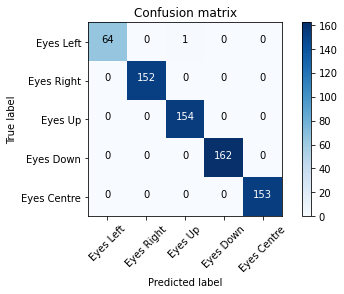

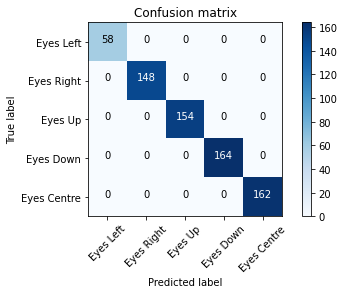

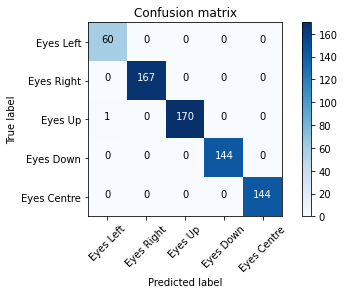

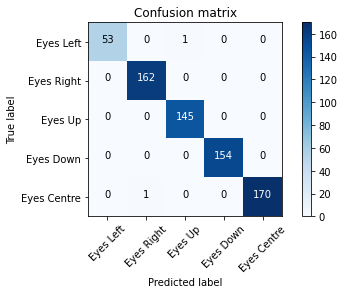

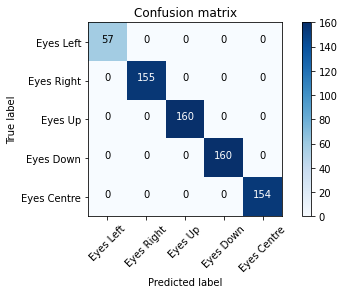

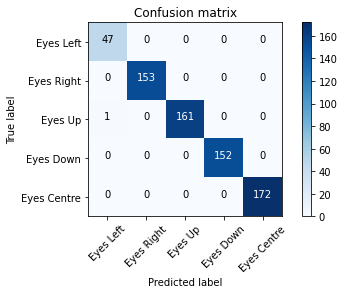

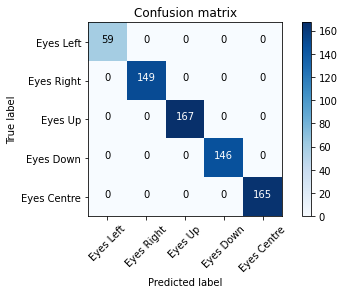

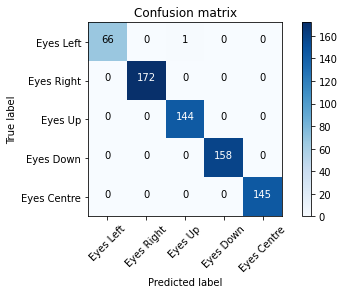

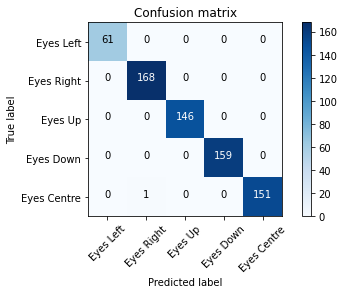

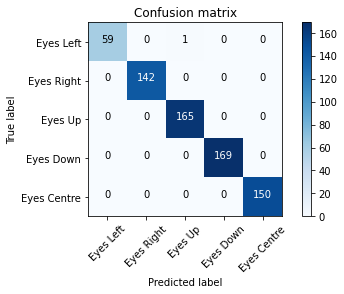

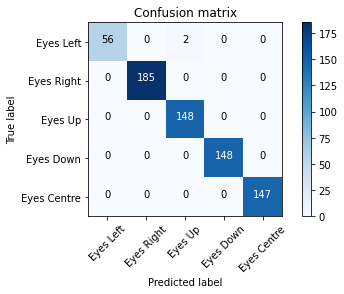

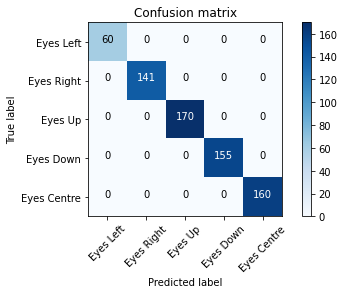

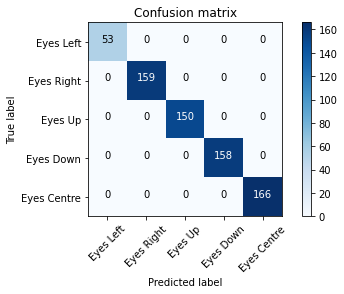

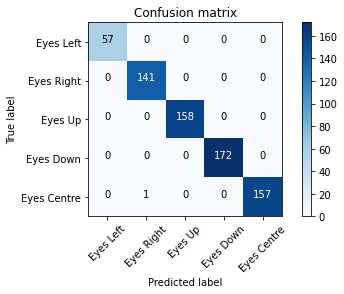

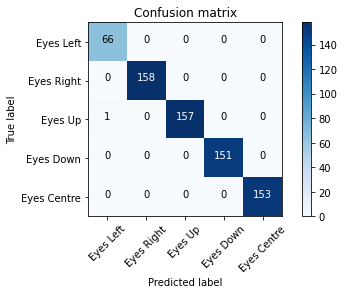

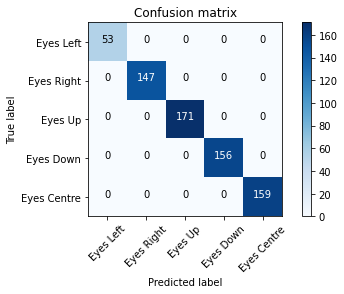

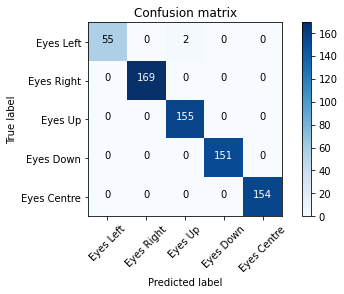

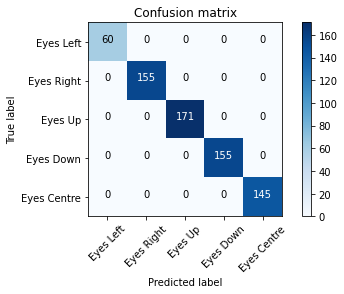

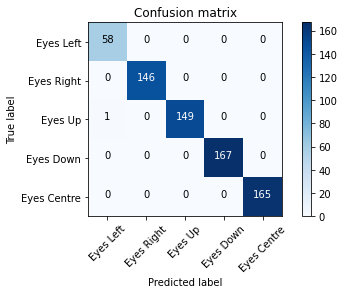

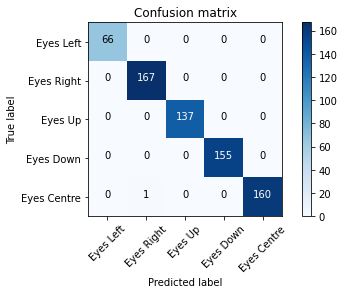

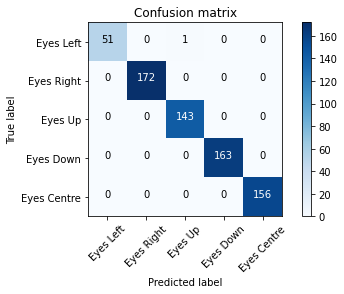

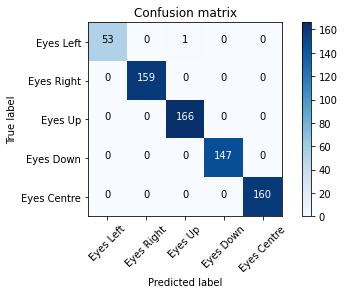

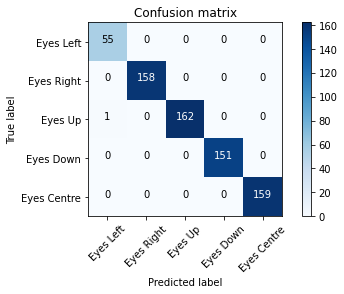

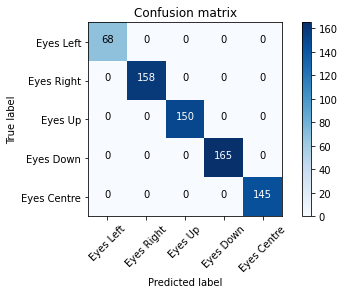

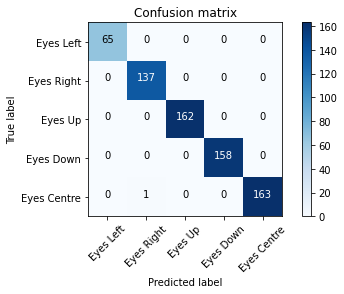

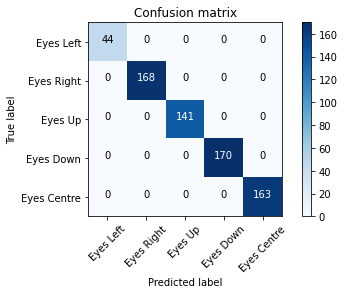

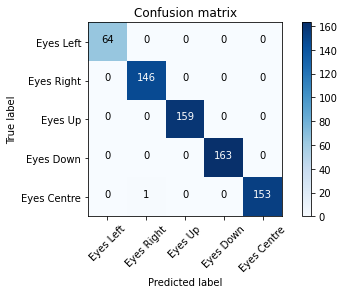

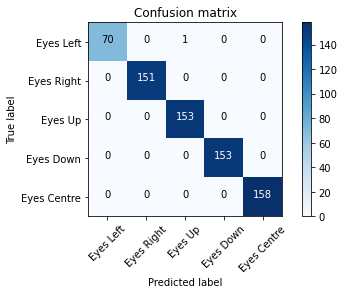

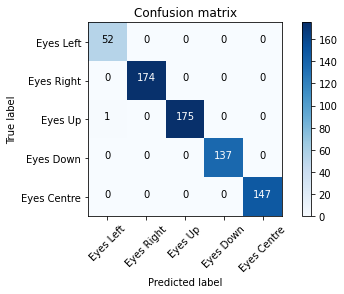

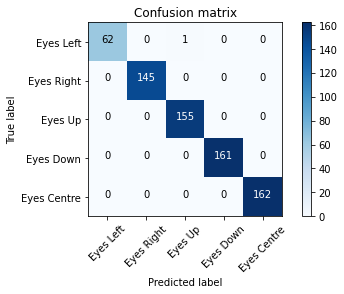

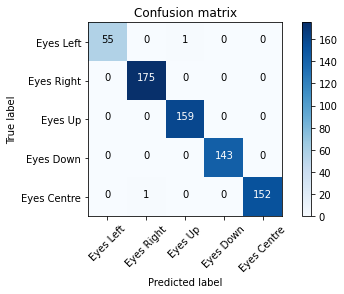

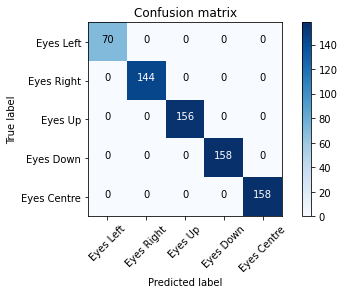

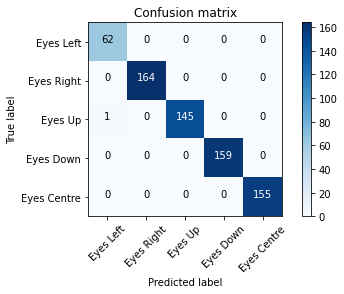

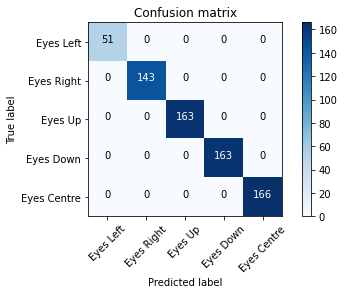

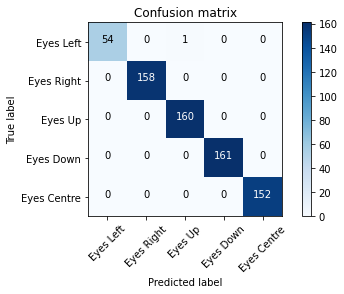

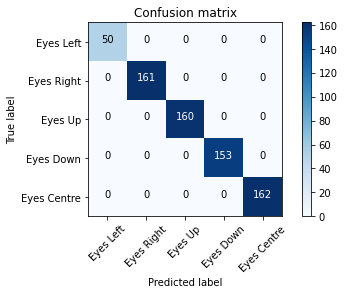

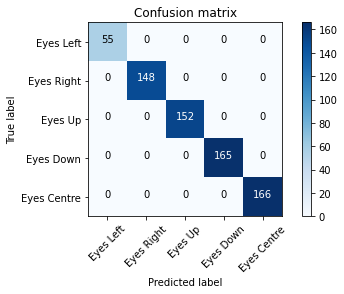

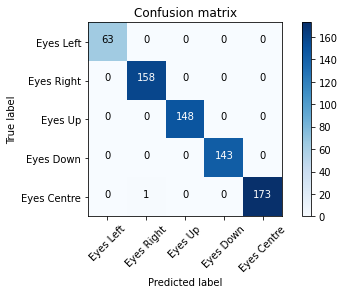

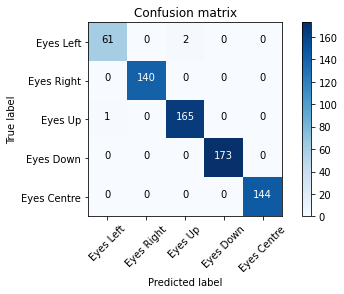

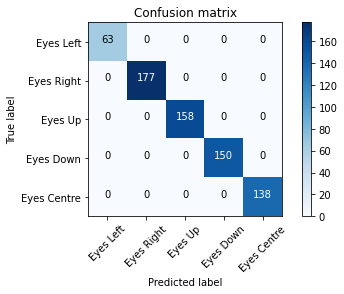

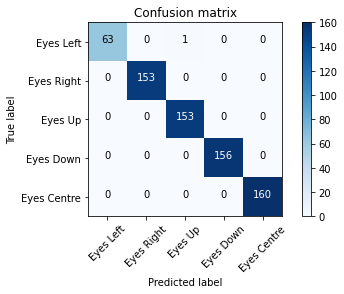

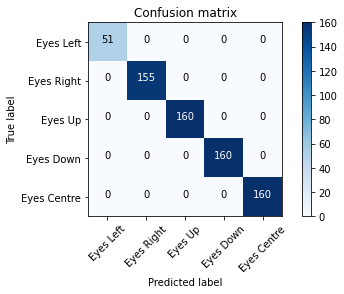

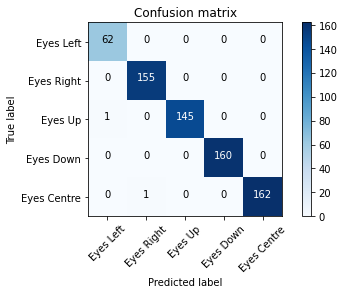

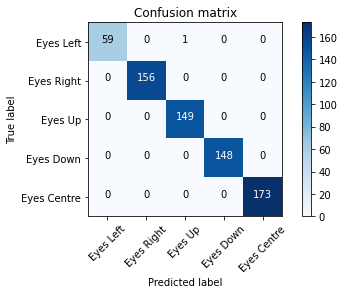

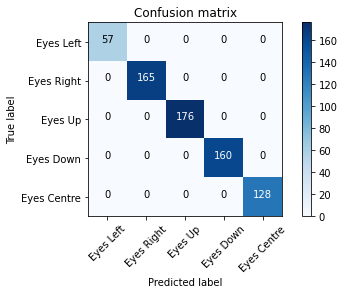

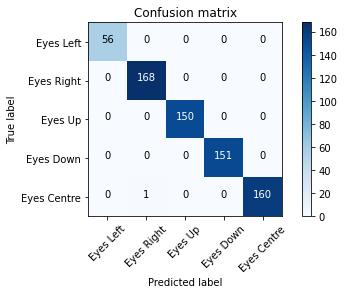

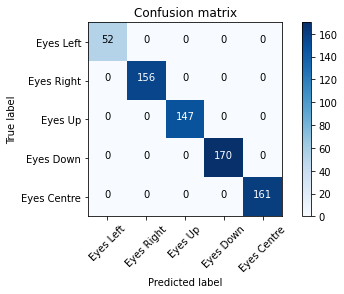

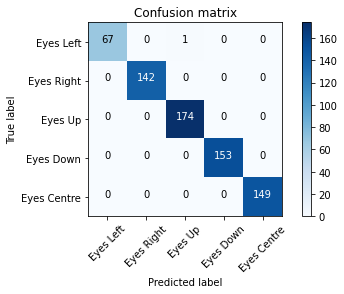

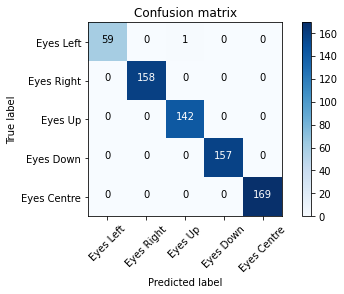

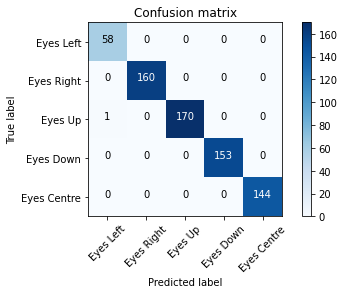

In [17]:
for train_index, test_index in kf.split(X):
    X_train, X_test = X[train_index], X[test_index] 
    y_train, y_test = y[train_index], y[test_index]

    for algo, model in gb.items():
        
        yhat = model.predict(X_test)
        print(algo, accuracy_score(y_test, yhat))
        # Compute confusion matrix
        cnf_matrix = confusion_matrix(y_test, yhat, labels=[0,1,2,3,4])
        np.set_printoptions(precision=2)

        print (classification_report(y_test, yhat))

        # Plot non-normalized confusion matrix
        plt.figure()
        plot_confusion_matrix(cnf_matrix, classes=['Eyes Up', 'Eyes Down', 'Eyes Centre', 'Eyes Right', 'Eyes Left'],normalize= False,  title='Confusion matrix')


## LR Model

lr 0.9985422740524781
              precision    recall  f1-score   support

           0       0.99      1.00      0.99        69
           1       1.00      1.00      1.00       138
           2       1.00      0.99      1.00       159
           3       1.00      1.00      1.00       161
           4       1.00      1.00      1.00       159

   micro avg       1.00      1.00      1.00       686
   macro avg       1.00      1.00      1.00       686
weighted avg       1.00      1.00      1.00       686

Confusion matrix, without normalization
[[ 69   0   0   0   0]
 [  0 138   0   0   0]
 [  1   0 158   0   0]
 [  0   0   0 161   0]
 [  0   0   0   0 159]]
lr 0.9941690962099126
              precision    recall  f1-score   support

           0       0.96      0.99      0.97        71
           1       1.00      1.00      1.00       152
           2       0.99      0.98      0.99       136
           3       1.00      1.00      1.00       153
           4       1.00      1.00      1

              precision    recall  f1-score   support

           0       0.98      0.98      0.98        58
           1       1.00      1.00      1.00       170
           2       1.00      0.99      1.00       145
           3       1.00      1.00      1.00       150
           4       0.99      1.00      1.00       163

   micro avg       1.00      1.00      1.00       686
   macro avg       1.00      1.00      1.00       686
weighted avg       1.00      1.00      1.00       686

Confusion matrix, without normalization
[[ 57   0   0   0   1]
 [  0 170   0   0   0]
 [  1   0 144   0   0]
 [  0   0   0 150   0]
 [  0   0   0   0 163]]
lr 0.9956268221574344
              precision    recall  f1-score   support

           0       0.98      0.98      0.98        61
           1       1.00      1.00      1.00       149
           2       0.99      0.99      0.99       175
           3       0.99      1.00      1.00       147
           4       1.00      1.00      1.00       154

   micr

c:\users\roxan\appdata\local\programs\python\python37\lib\site-packages\ipykernel_launcher.py:16: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  app.launch_new_instance()


              precision    recall  f1-score   support

           0       0.98      0.98      0.98        50
           1       1.00      1.00      1.00       145
           2       0.99      0.99      0.99       171
           3       0.99      1.00      1.00       169
           4       1.00      0.99      1.00       151

   micro avg       0.99      0.99      0.99       686
   macro avg       0.99      0.99      0.99       686
weighted avg       0.99      0.99      0.99       686

Confusion matrix, without normalization
[[ 49   0   1   0   0]
 [  0 145   0   0   0]
 [  1   0 169   1   0]
 [  0   0   0 169   0]
 [  0   0   1   0 150]]
lr 0.9985422740524781
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        49
           1       1.00      1.00      1.00       179
           2       1.00      0.99      1.00       156
           3       0.99      1.00      1.00       135
           4       1.00      1.00      1.00       167

   micr

              precision    recall  f1-score   support

           0       0.98      1.00      0.99        62
           1       1.00      1.00      1.00       160
           2       1.00      0.99      1.00       160
           3       1.00      1.00      1.00       147
           4       1.00      1.00      1.00       157

   micro avg       1.00      1.00      1.00       686
   macro avg       1.00      1.00      1.00       686
weighted avg       1.00      1.00      1.00       686

Confusion matrix, without normalization
[[ 62   0   0   0   0]
 [  0 160   0   0   0]
 [  1   0 159   0   0]
 [  0   0   0 147   0]
 [  0   0   0   0 157]]
lr 0.9985422740524781
              precision    recall  f1-score   support

           0       1.00      0.98      0.99        54
           1       1.00      1.00      1.00       156
           2       0.99      1.00      1.00       156
           3       1.00      1.00      1.00       163
           4       1.00      1.00      1.00       157

   micr

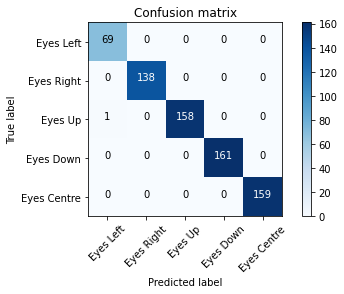

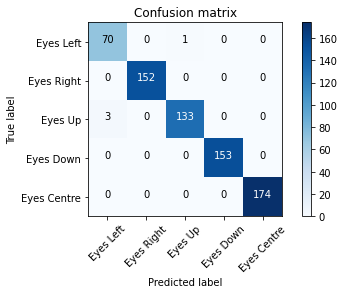

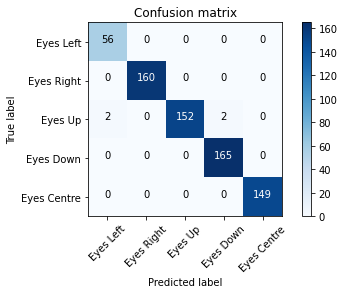

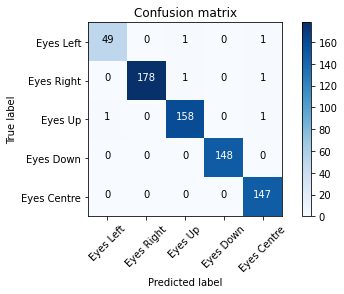

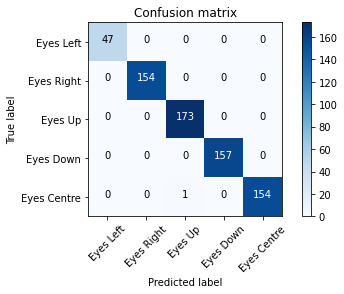

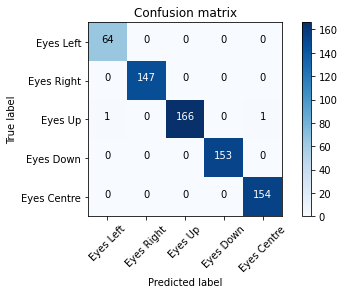

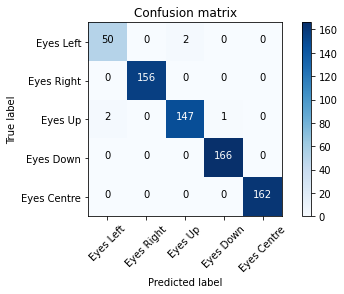

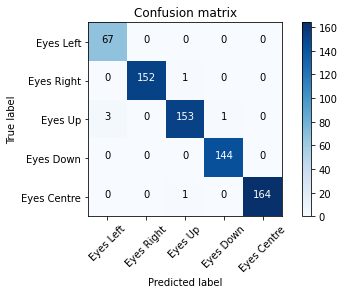

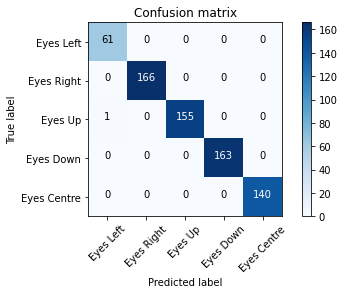

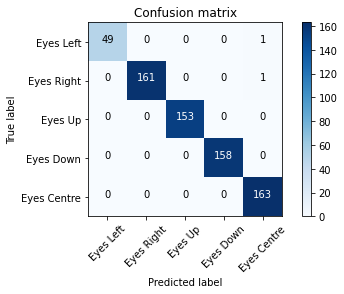

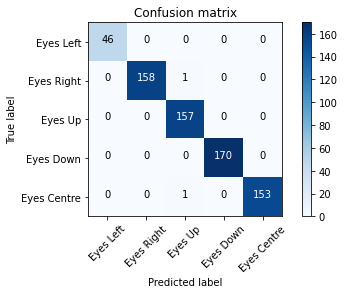

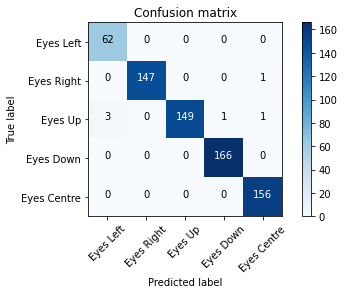

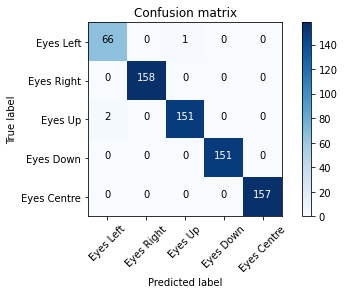

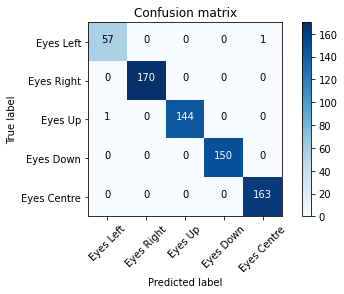

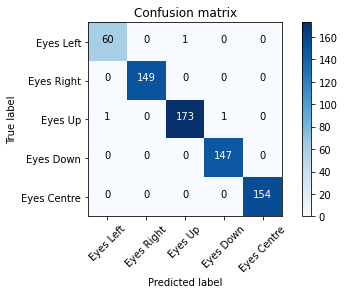

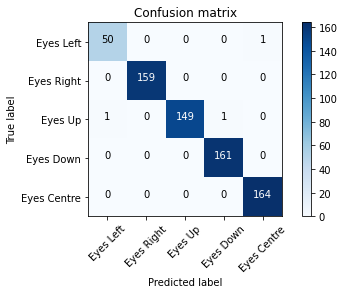

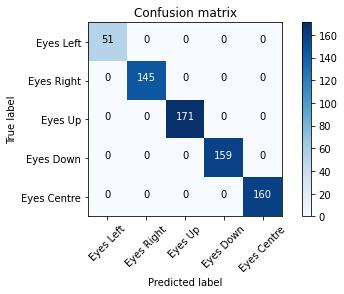

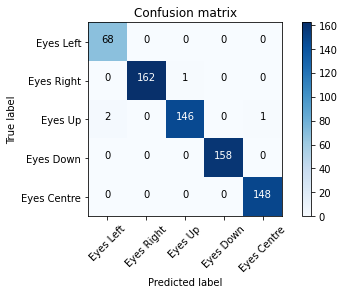

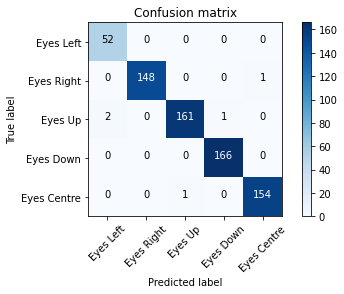

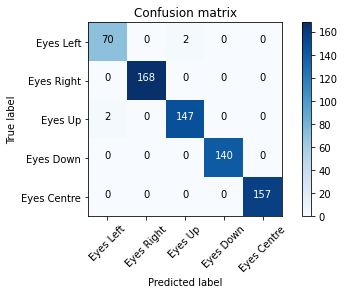

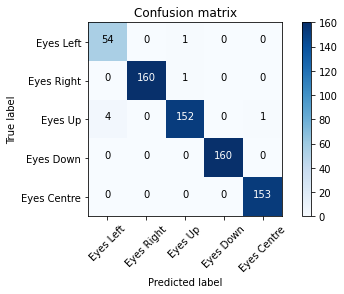

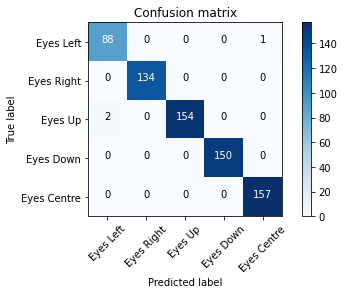

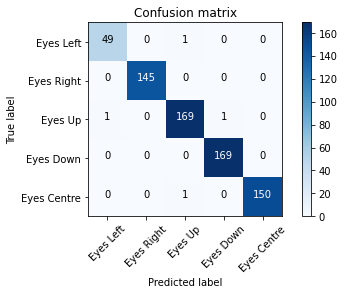

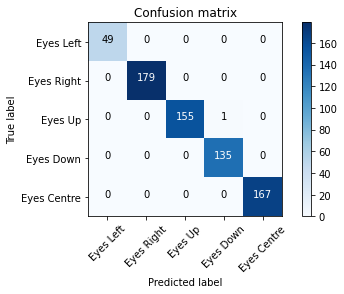

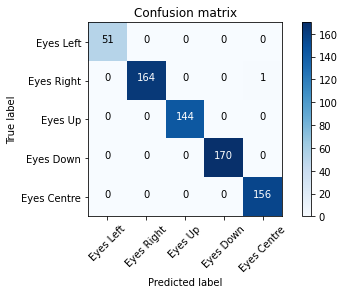

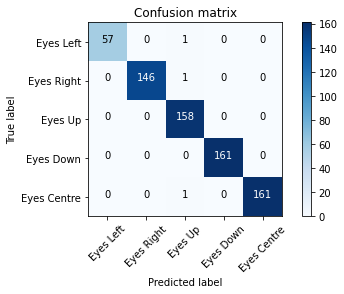

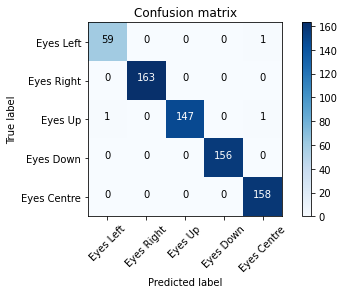

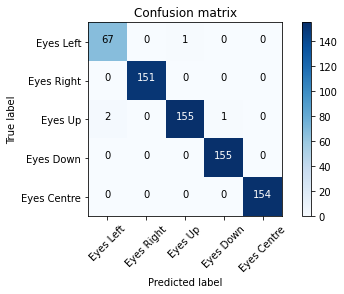

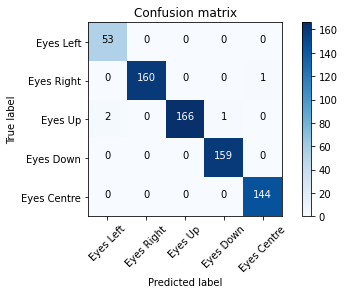

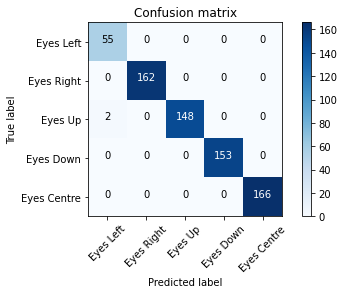

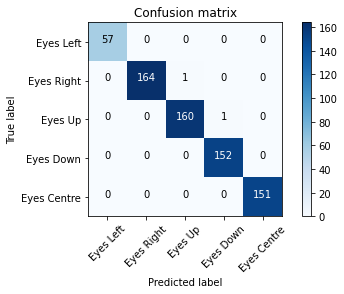

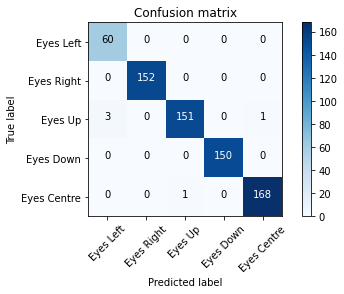

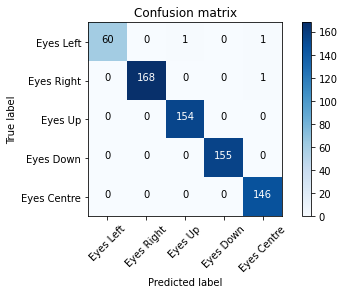

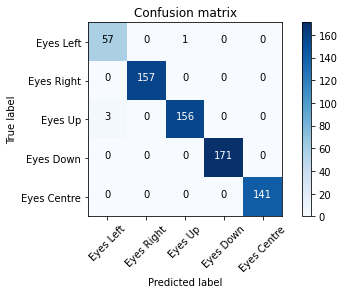

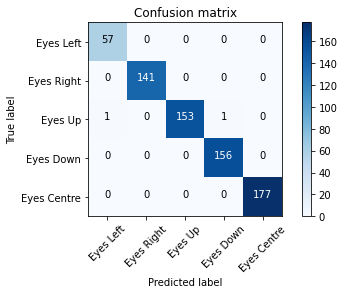

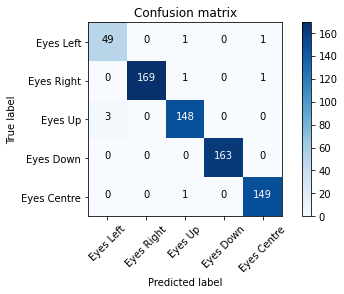

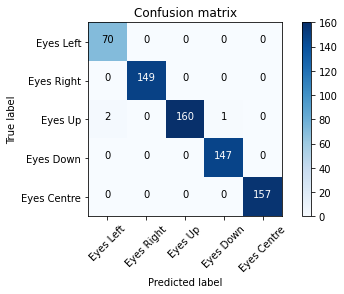

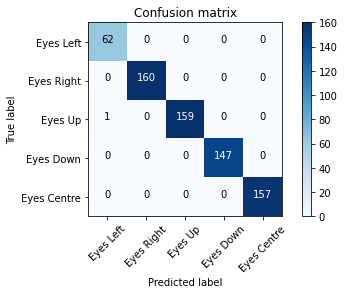

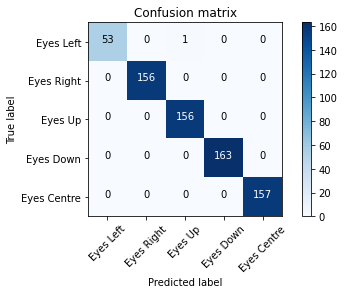

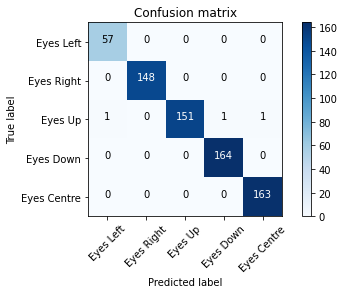

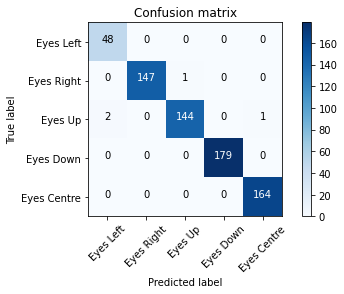

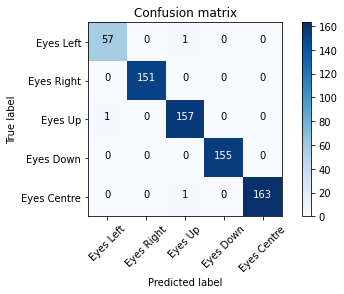

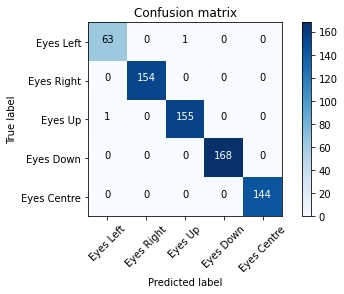

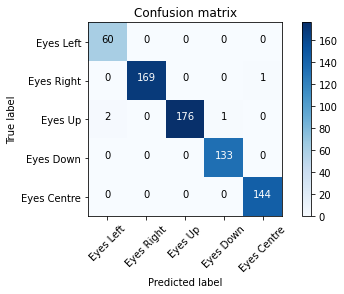

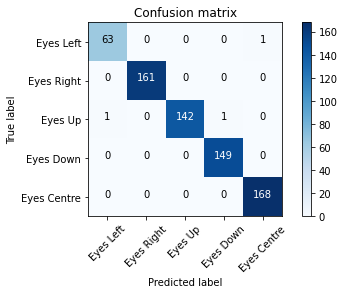

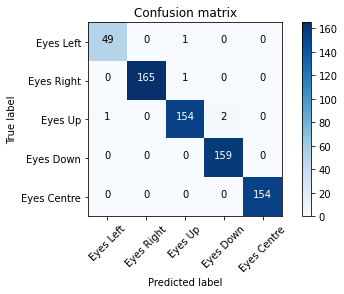

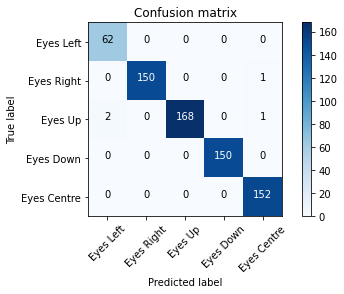

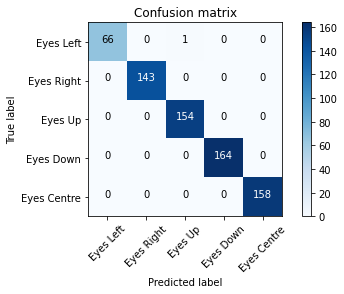

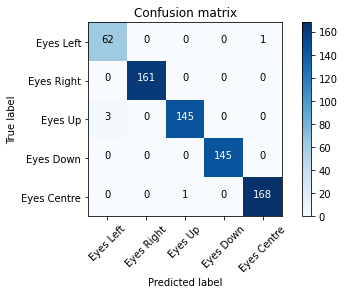

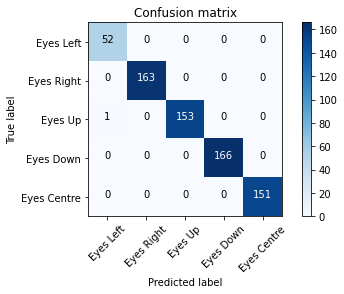

In [18]:
for train_index, test_index in kf.split(X):
    X_train, X_test = X[train_index], X[test_index] 
    y_train, y_test = y[train_index], y[test_index]

    for algo, model in lr.items():
        
        yhat = model.predict(X_test)
        print(algo, accuracy_score(y_test, yhat))
        # Compute confusion matrix
        cnf_matrix = confusion_matrix(y_test, yhat, labels=[0,1,2,3,4])
        np.set_printoptions(precision=2)

        print (classification_report(y_test, yhat))

        # Plot non-normalized confusion matrix
        plt.figure()
        plot_confusion_matrix(cnf_matrix, classes=['Eyes Up', 'Eyes Down', 'Eyes Centre', 'Eyes Right', 'Eyes Left'],normalize= False,  title='Confusion matrix')


## RF Model

rf 1.0
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        55
           1       1.00      1.00      1.00       167
           2       1.00      1.00      1.00       165
           3       1.00      1.00      1.00       143
           4       1.00      1.00      1.00       156

   micro avg       1.00      1.00      1.00       686
   macro avg       1.00      1.00      1.00       686
weighted avg       1.00      1.00      1.00       686

Confusion matrix, without normalization
[[ 55   0   0   0   0]
 [  0 167   0   0   0]
 [  0   0 165   0   0]
 [  0   0   0 143   0]
 [  0   0   0   0 156]]
rf 0.9970845481049563
              precision    recall  f1-score   support

           0       0.98      0.98      0.98        63
           1       1.00      1.00      1.00       161
           2       0.99      0.99      0.99       152
           3       1.00      1.00      1.00       160
           4       1.00      1.00      1.00       150



rf 0.9970845481049563
              precision    recall  f1-score   support

           0       1.00      0.98      0.99        56
           1       0.99      1.00      1.00       156
           2       0.99      1.00      1.00       162
           3       1.00      1.00      1.00       164
           4       1.00      0.99      1.00       148

   micro avg       1.00      1.00      1.00       686
   macro avg       1.00      1.00      1.00       686
weighted avg       1.00      1.00      1.00       686

Confusion matrix, without normalization
[[ 55   0   1   0   0]
 [  0 156   0   0   0]
 [  0   0 162   0   0]
 [  0   0   0 164   0]
 [  0   1   0   0 147]]
rf 0.9970845481049563
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        54
           1       1.00      1.00      1.00       174
           2       0.99      0.99      0.99       152
           3       1.00      1.00      1.00       149
           4       0.99      0.99      0

c:\users\roxan\appdata\local\programs\python\python37\lib\site-packages\ipykernel_launcher.py:16: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  app.launch_new_instance()


              precision    recall  f1-score   support

           0       1.00      1.00      1.00        64
           1       0.99      1.00      1.00       157
           2       1.00      1.00      1.00       139
           3       1.00      1.00      1.00       166
           4       1.00      0.99      1.00       160

   micro avg       1.00      1.00      1.00       686
   macro avg       1.00      1.00      1.00       686
weighted avg       1.00      1.00      1.00       686

Confusion matrix, without normalization
[[ 64   0   0   0   0]
 [  0 157   0   0   0]
 [  0   0 139   0   0]
 [  0   0   0 166   0]
 [  0   1   0   0 159]]
rf 1.0
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        60
           1       1.00      1.00      1.00       142
           2       1.00      1.00      1.00       176
           3       1.00      1.00      1.00       149
           4       1.00      1.00      1.00       159

   micro avg       1.0

rf 0.9970845481049563
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        61
           1       0.99      1.00      1.00       163
           2       0.99      1.00      1.00       152
           3       1.00      1.00      1.00       146
           4       1.00      0.99      0.99       164

   micro avg       1.00      1.00      1.00       686
   macro avg       1.00      1.00      1.00       686
weighted avg       1.00      1.00      1.00       686

Confusion matrix, without normalization
[[ 61   0   0   0   0]
 [  0 163   0   0   0]
 [  0   0 152   0   0]
 [  0   0   0 146   0]
 [  0   1   1   0 162]]
rf 0.9970845481049563
              precision    recall  f1-score   support

           0       0.99      0.99      0.99        71
           1       1.00      1.00      1.00       140
           2       0.99      0.99      0.99       168
           3       1.00      1.00      1.00       154
           4       1.00      1.00      1

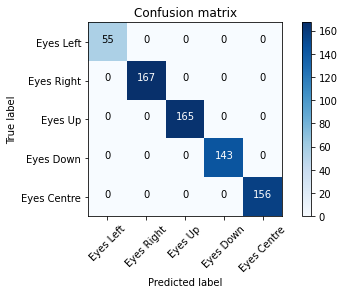

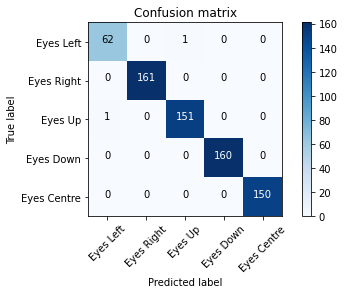

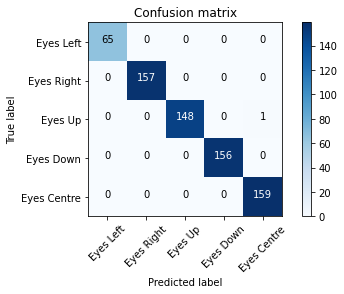

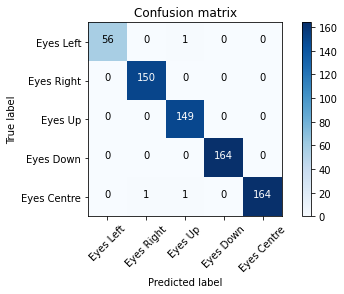

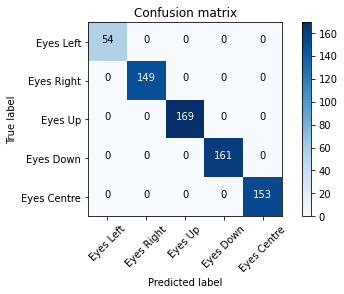

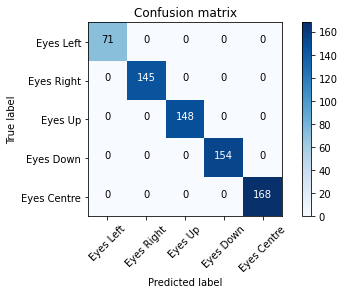

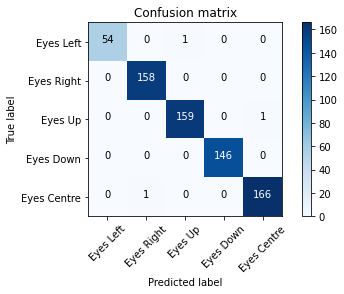

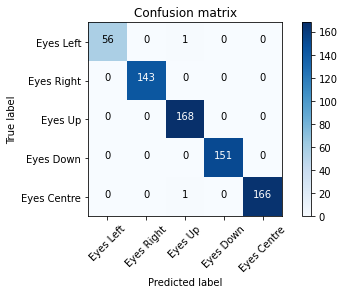

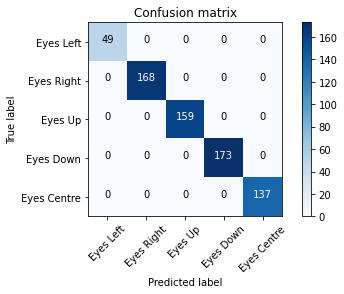

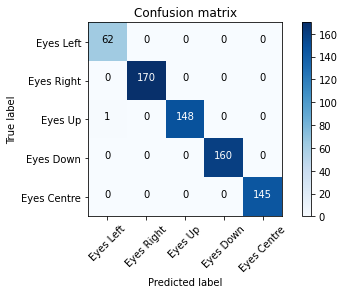

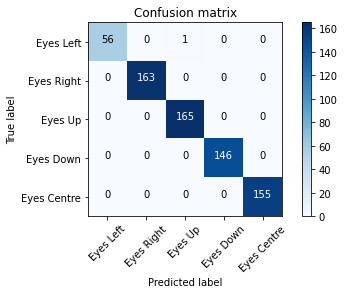

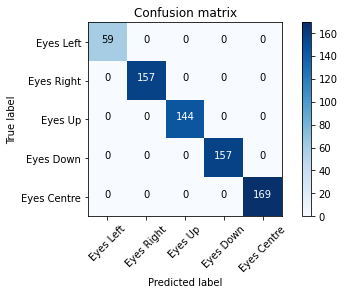

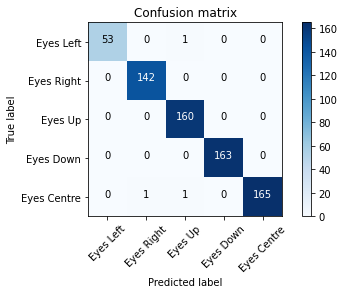

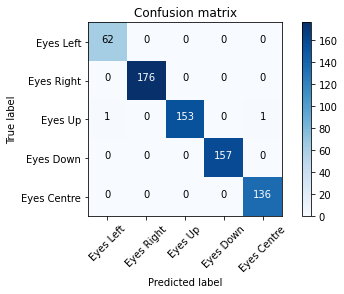

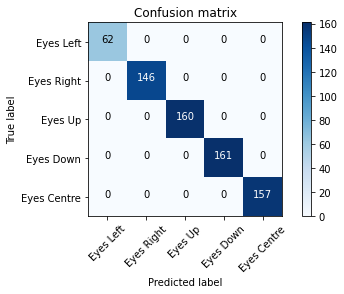

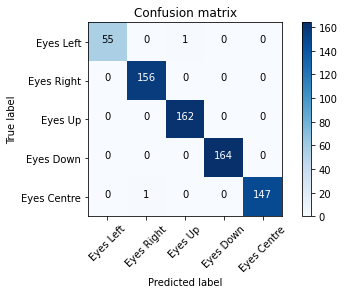

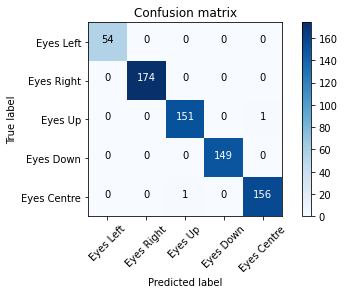

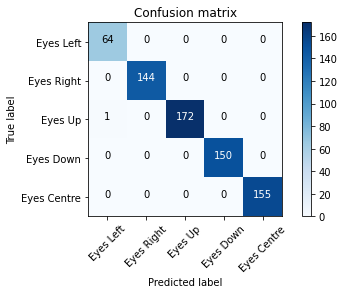

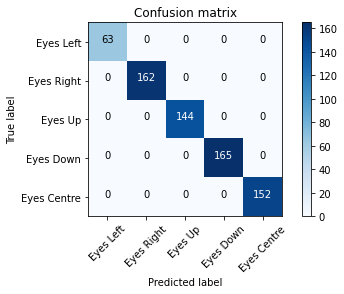

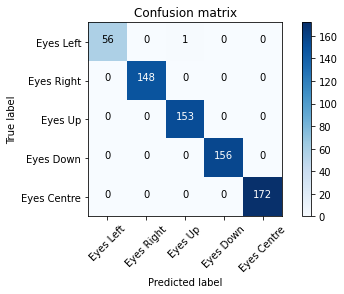

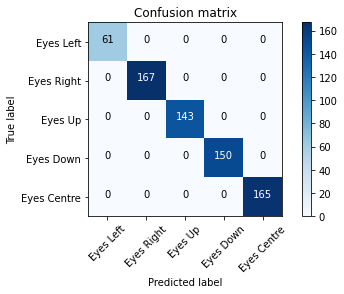

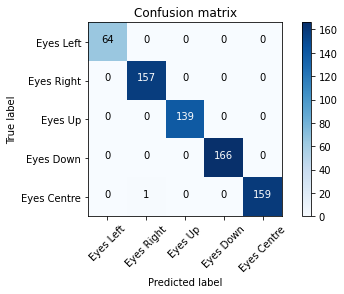

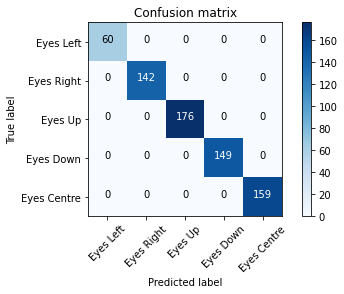

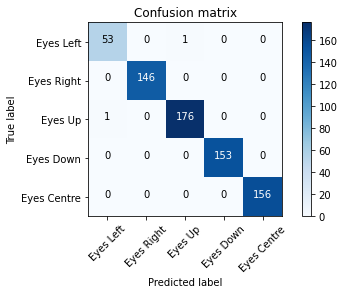

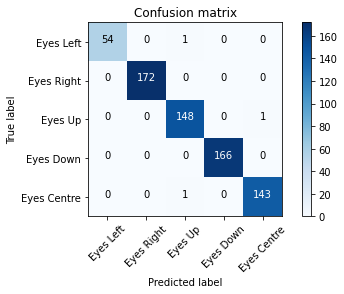

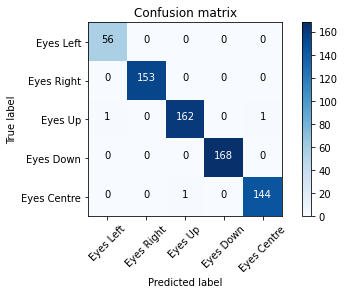

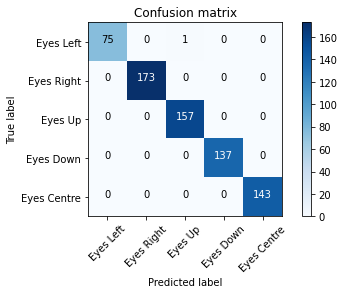

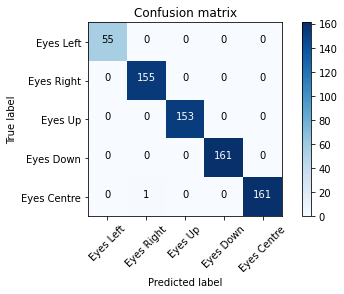

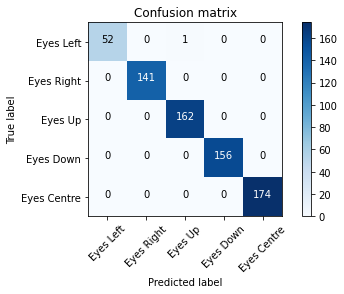

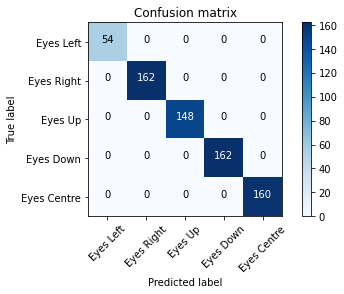

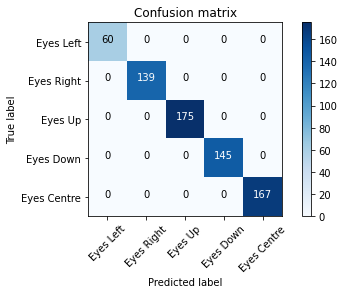

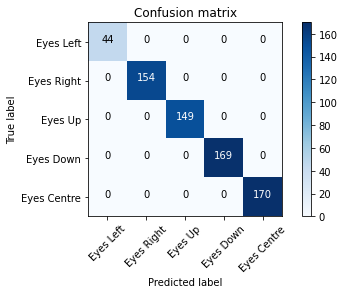

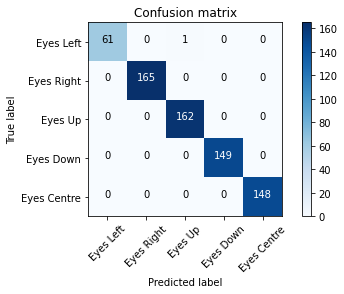

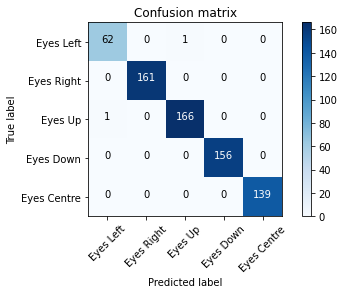

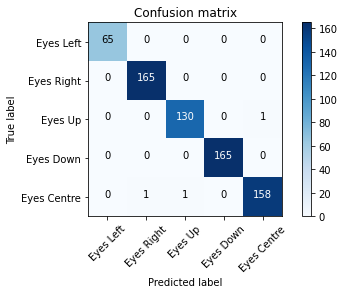

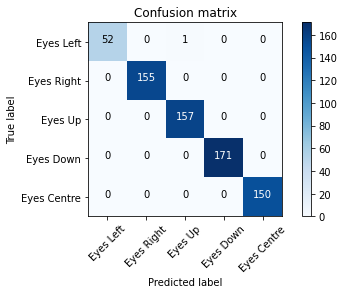

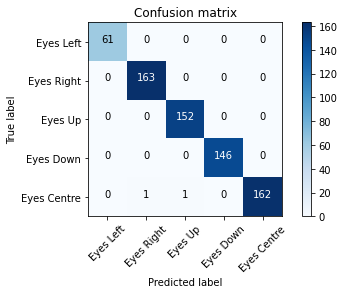

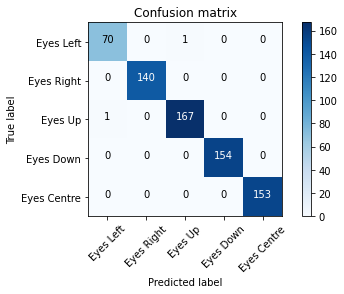

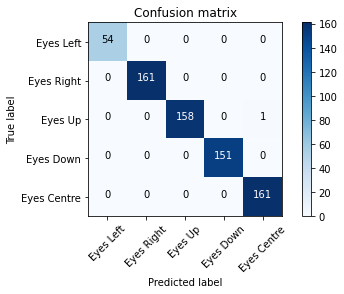

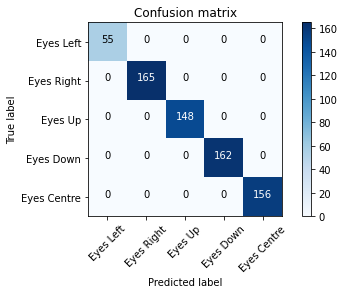

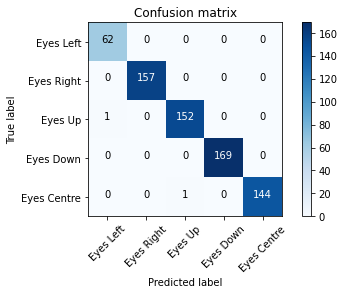

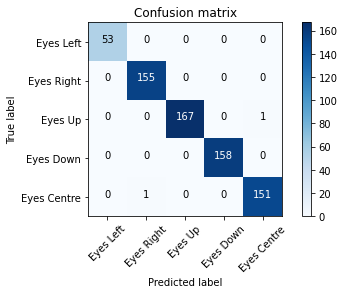

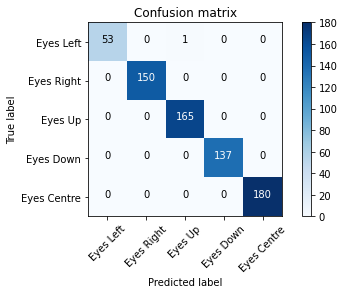

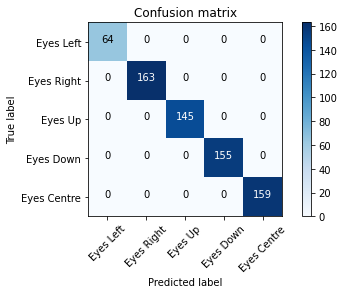

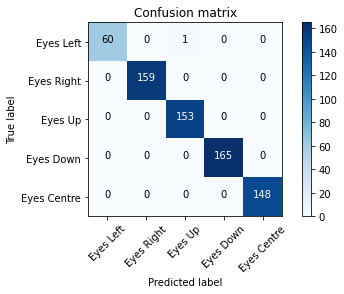

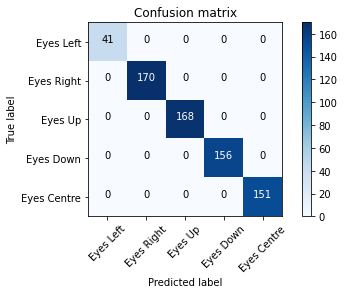

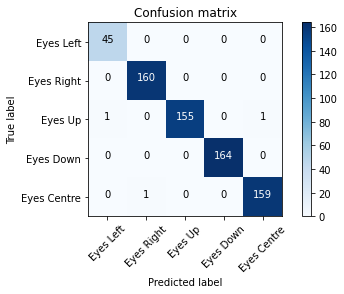

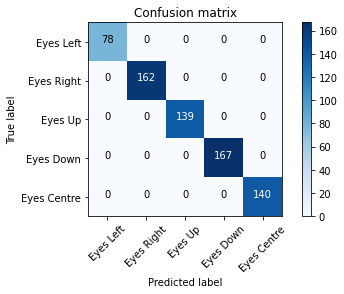

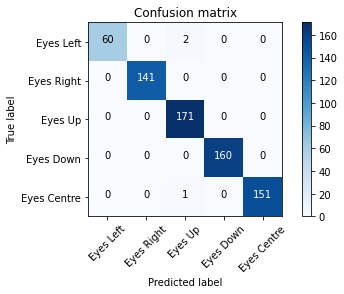

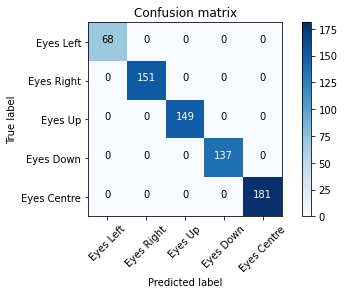

In [19]:
for train_index, test_index in kf.split(X):
    X_train, X_test = X[train_index], X[test_index] 
    y_train, y_test = y[train_index], y[test_index]

    for algo, model in rf.items():
        
        yhat = model.predict(X_test)
        print(algo, accuracy_score(y_test, yhat))
        # Compute confusion matrix
        cnf_matrix = confusion_matrix(y_test, yhat, labels=[0,1,2,3,4])
        np.set_printoptions(precision=2)

        print (classification_report(y_test, yhat))

        # Plot non-normalized confusion matrix
        plt.figure()
        plot_confusion_matrix(cnf_matrix, classes=['Eyes Up', 'Eyes Down', 'Eyes Centre', 'Eyes Right', 'Eyes Left'],normalize= False,  title='Confusion matrix')


## RC Model

rc 0.9897959183673469
              precision    recall  f1-score   support

           0       1.00      0.96      0.98        50
           1       0.99      0.98      0.99       169
           2       0.97      0.99      0.98       156
           3       1.00      0.99      1.00       150
           4       0.99      1.00      0.99       161

   micro avg       0.99      0.99      0.99       686
   macro avg       0.99      0.99      0.99       686
weighted avg       0.99      0.99      0.99       686

Confusion matrix, without normalization
[[ 48   1   1   0   0]
 [  0 166   3   0   0]
 [  0   0 155   0   1]
 [  0   0   0 149   1]
 [  0   0   0   0 161]]
rc 0.9941690962099126
              precision    recall  f1-score   support

           0       1.00      0.98      0.99        60
           1       0.99      0.99      0.99       153
           2       0.99      0.99      0.99       146
           3       0.99      1.00      1.00       175
           4       0.99      0.99      0

              precision    recall  f1-score   support

           0       1.00      0.97      0.98        65
           1       0.99      1.00      1.00       158
           2       0.99      0.99      0.99       163
           3       1.00      1.00      1.00       163
           4       0.99      0.99      0.99       137

   micro avg       0.99      0.99      0.99       686
   macro avg       0.99      0.99      0.99       686
weighted avg       0.99      0.99      0.99       686

Confusion matrix, without normalization
[[ 63   1   1   0   0]
 [  0 158   0   0   0]
 [  0   0 161   0   2]
 [  0   0   0 163   0]
 [  0   0   1   0 136]]
rc 0.9941690962099126
              precision    recall  f1-score   support

           0       1.00      0.98      0.99        61
           1       0.99      1.00      1.00       159
           2       1.00      0.99      1.00       155
           3       0.99      0.99      0.99       153
           4       0.99      0.99      0.99       158

   micr

c:\users\roxan\appdata\local\programs\python\python37\lib\site-packages\ipykernel_launcher.py:16: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  app.launch_new_instance()


              precision    recall  f1-score   support

           0       1.00      0.97      0.98        65
           1       0.99      1.00      0.99       166
           2       1.00      0.99      1.00       137
           3       1.00      1.00      1.00       157
           4       0.99      1.00      1.00       161

   micro avg       1.00      1.00      1.00       686
   macro avg       1.00      0.99      0.99       686
weighted avg       1.00      1.00      1.00       686

Confusion matrix, without normalization
[[ 63   2   0   0   0]
 [  0 166   0   0   0]
 [  0   0 136   0   1]
 [  0   0   0 157   0]
 [  0   0   0   0 161]]
rc 0.9897959183673469
              precision    recall  f1-score   support

           0       0.98      0.95      0.96        55
           1       0.99      0.98      0.98       144
           2       0.98      0.99      0.99       174
           3       1.00      1.00      1.00       172
           4       1.00      1.00      1.00       141

   micr

rc 0.9956268221574344
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        61
           1       1.00      1.00      1.00       148
           2       1.00      0.99      0.99       156
           3       0.99      0.99      0.99       164
           4       0.99      1.00      0.99       157

   micro avg       1.00      1.00      1.00       686
   macro avg       1.00      1.00      1.00       686
weighted avg       1.00      1.00      1.00       686

Confusion matrix, without normalization
[[ 61   0   0   0   0]
 [  0 148   0   0   0]
 [  0   0 154   1   1]
 [  0   0   0 163   1]
 [  0   0   0   0 157]]
rc 0.9912536443148688
              precision    recall  f1-score   support

           0       1.00      0.96      0.98        69
           1       0.99      0.99      0.99       143
           2       0.98      1.00      0.99       167
           3       0.99      0.99      0.99       149
           4       0.99      0.99      0

              precision    recall  f1-score   support

           0       1.00      0.98      0.99        58
           1       0.99      0.99      0.99       154
           2       0.99      1.00      0.99       145
           3       1.00      1.00      1.00       166
           4       1.00      1.00      1.00       163

   micro avg       1.00      1.00      1.00       686
   macro avg       1.00      0.99      0.99       686
weighted avg       1.00      1.00      1.00       686

Confusion matrix, without normalization
[[ 57   1   0   0   0]
 [  0 152   2   0   0]
 [  0   0 145   0   0]
 [  0   0   0 166   0]
 [  0   0   0   0 163]]
rc 0.9941690962099126
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        61
           1       1.00      0.99      0.99       172
           2       0.99      0.99      0.99       165
           3       1.00      1.00      1.00       137
           4       0.98      1.00      0.99       151

   micr

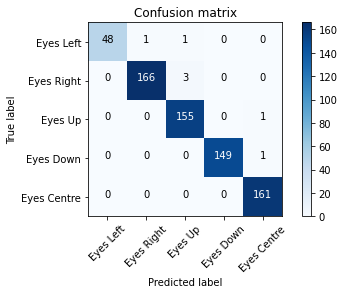

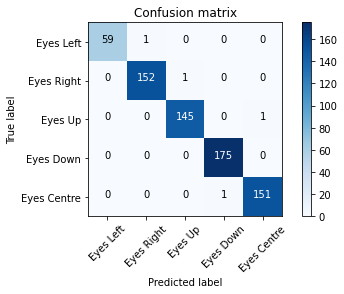

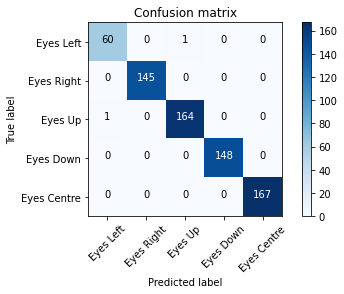

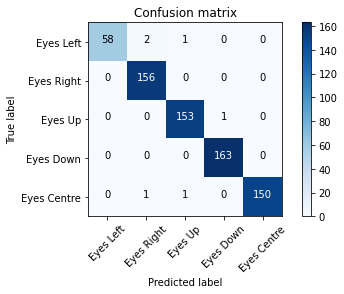

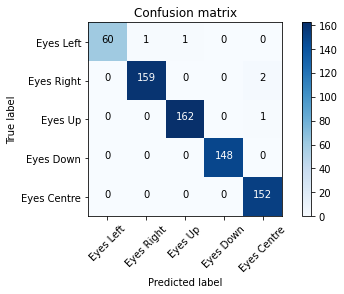

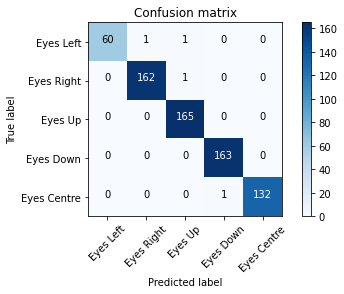

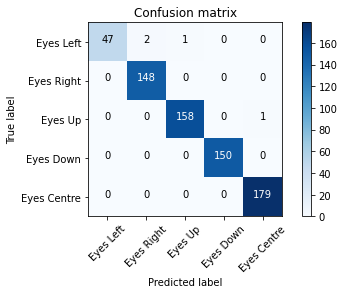

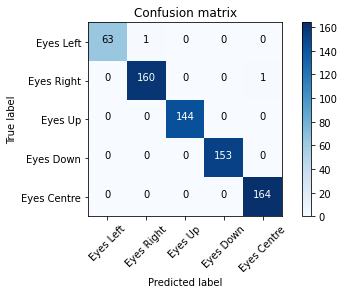

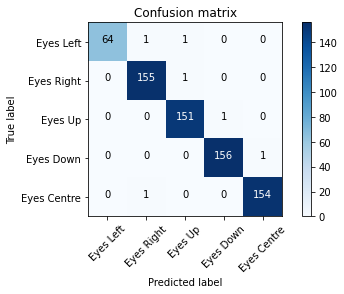

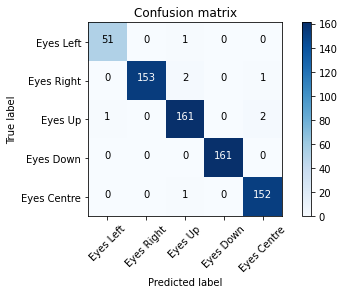

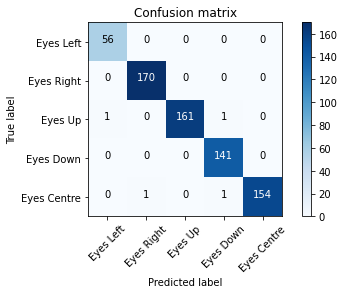

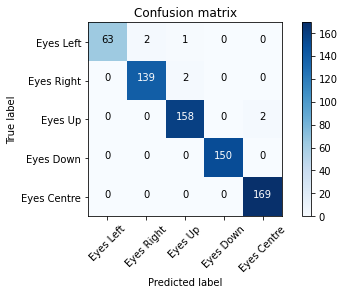

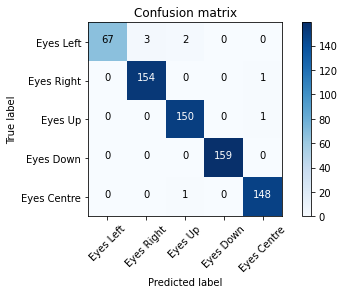

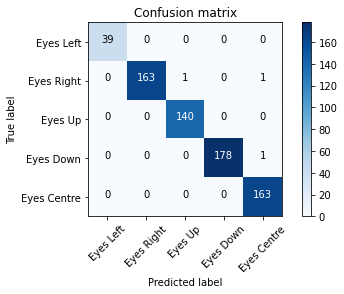

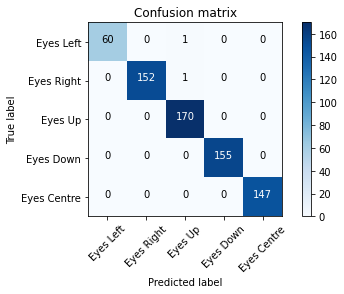

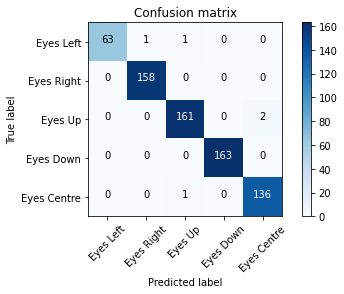

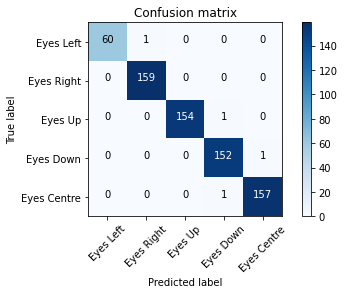

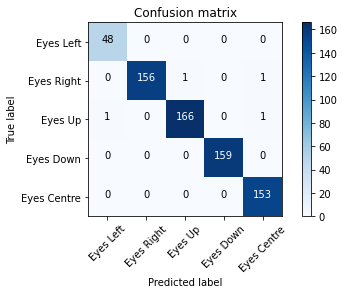

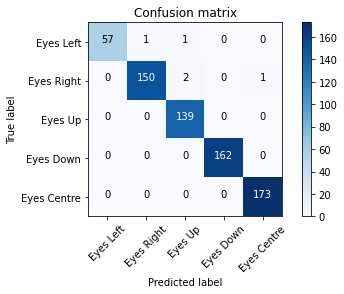

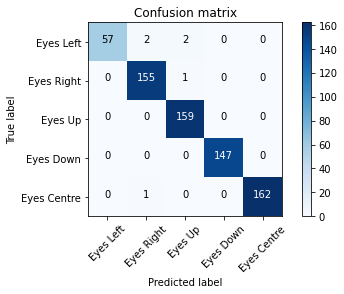

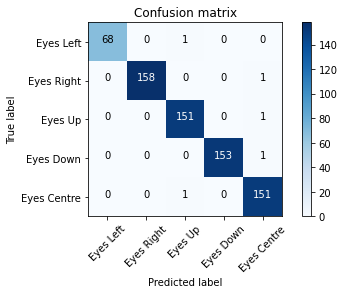

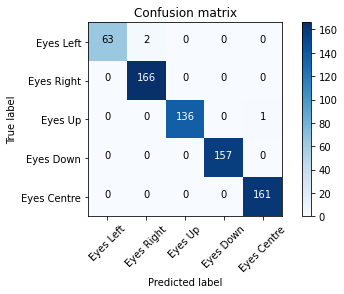

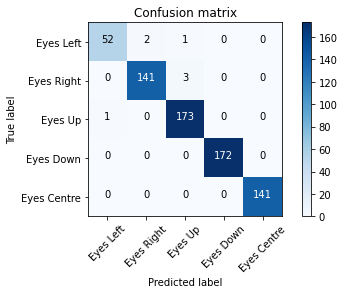

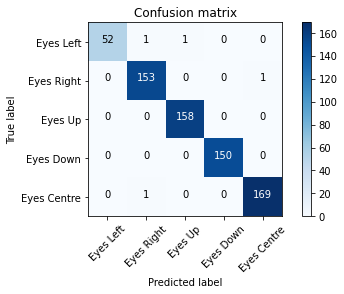

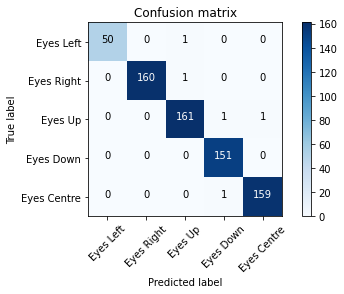

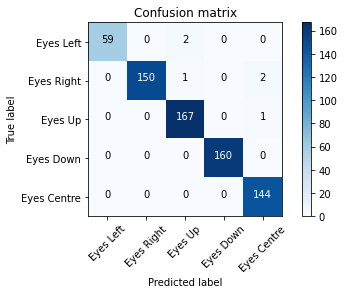

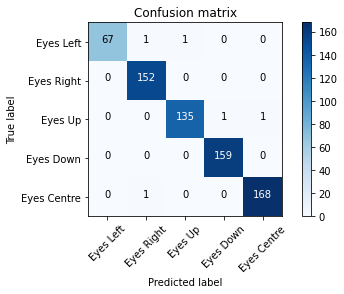

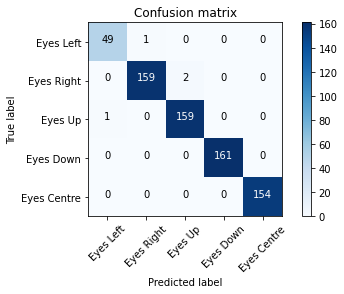

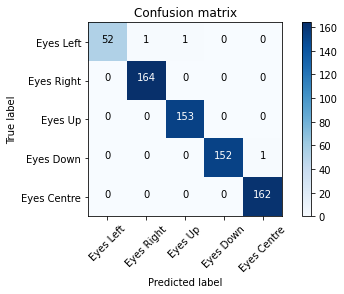

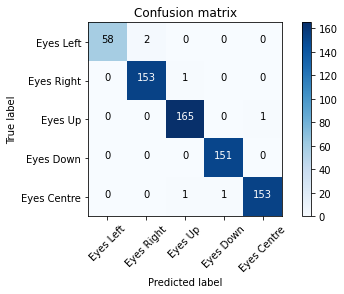

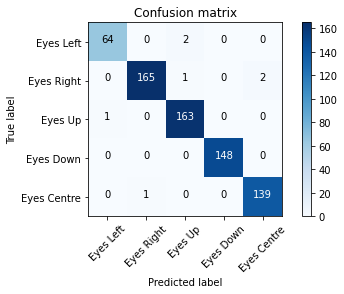

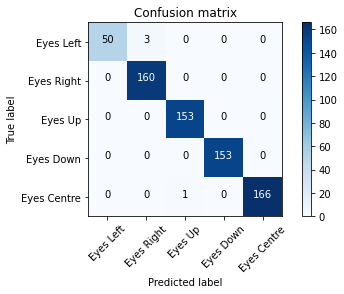

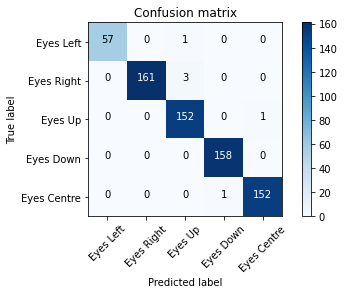

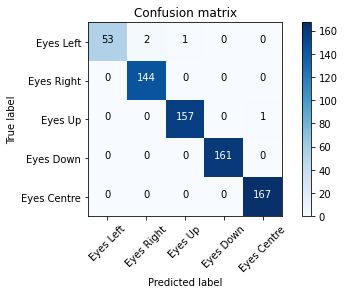

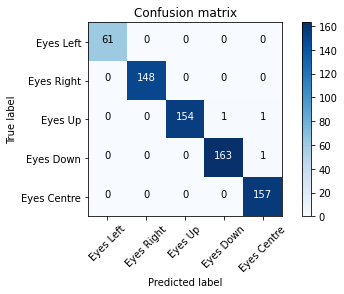

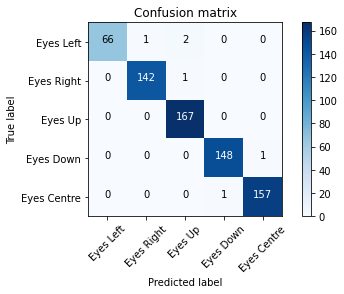

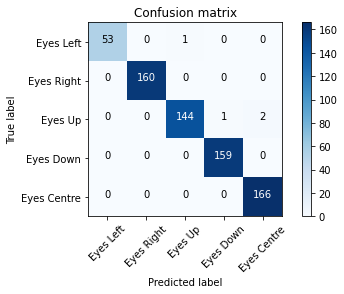

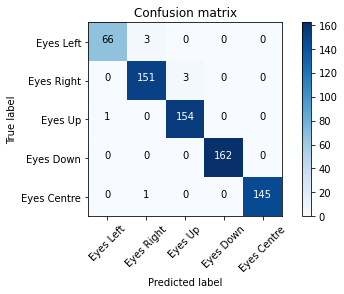

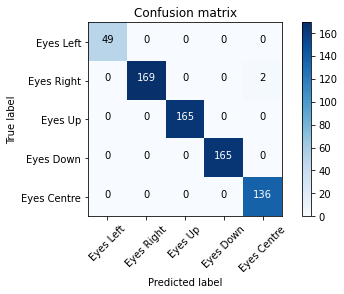

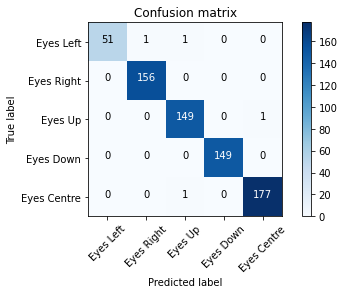

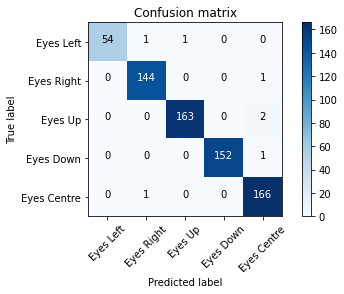

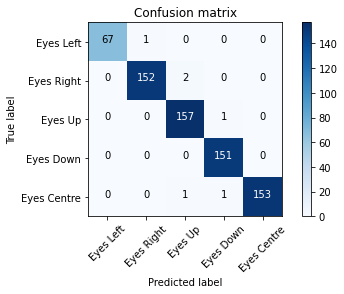

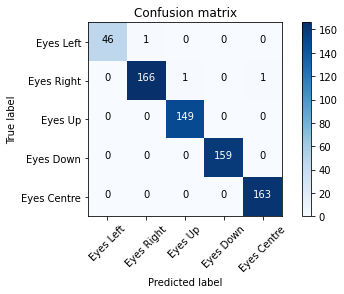

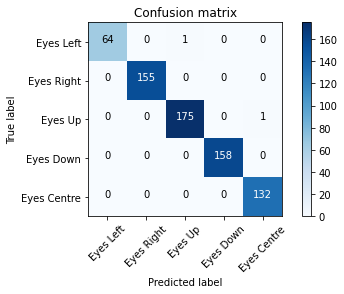

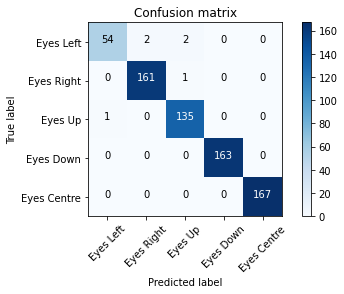

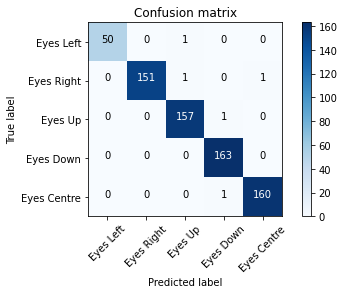

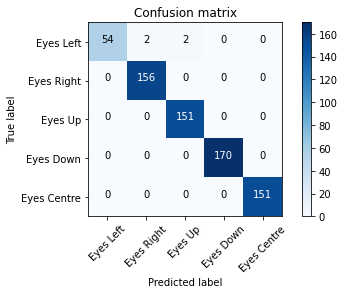

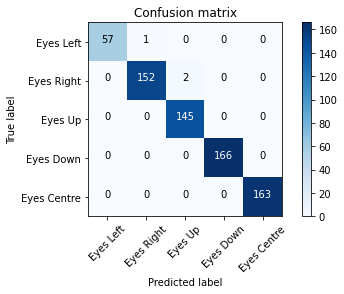

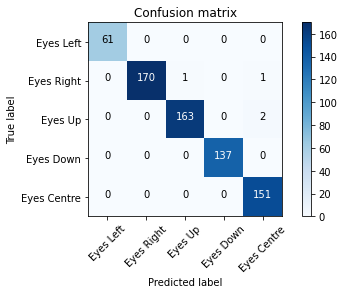

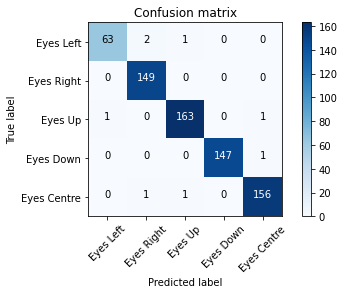

In [20]:
for train_index, test_index in kf.split(X):
    X_train, X_test = X[train_index], X[test_index] 
    y_train, y_test = y[train_index], y[test_index]

    for algo, model in rc.items():
        
        yhat = model.predict(X_test)
        print(algo, accuracy_score(y_test, yhat))
        # Compute confusion matrix
        cnf_matrix = confusion_matrix(y_test, yhat, labels=[0,1,2,3,4])
        np.set_printoptions(precision=2)

        print (classification_report(y_test, yhat))

        # Plot non-normalized confusion matrix
        plt.figure()
        plot_confusion_matrix(cnf_matrix, classes=['Eyes Up', 'Eyes Down', 'Eyes Centre', 'Eyes Right', 'Eyes Left'],normalize= False,  title='Confusion matrix')


In [21]:
import pickle
with open('iris_states_comp_0.pkl', 'wb') as f:
    pickle.dump(fit_models['gb'], f)